# Telecom Churn Prediction


#### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.


In [184]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.subplots as tls # It's useful to we get some tools of plotly

from collections import Counter # To do counter of some features
import plotly.io as pio


# Supress warnings
warnings.filterwarnings('ignore')

## Content

1. [Reading,Understanding and cleaning data](#)
2. [Filter high value customers](#)
3. [Outlier Treatment](#)
4. [Exploratory Data Analysis/Data Visualization](#)
    1. [Univariate Analysis](#)
    2. [Deriving new features](#)
    3. [Multivariate Analysis](#)
5. [Data Preparation](#)
6. [Splitting the Data into Training and Testing Sets](#)
7. [Model Building and Evaluation](#)
    1. [PCA and Logistic Regression](#)
    2. [](#)
    3. [Lasso Regression to determine important features](#)
8. [Observations](#)
9. [Top features](#)

## 1. Reading, Understanding and Cleaning the data

In [185]:
# Reading the train data set

Telecom_df = pd.read_csv('train.csv')

In [186]:
#Summary of the data set

Telecom_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

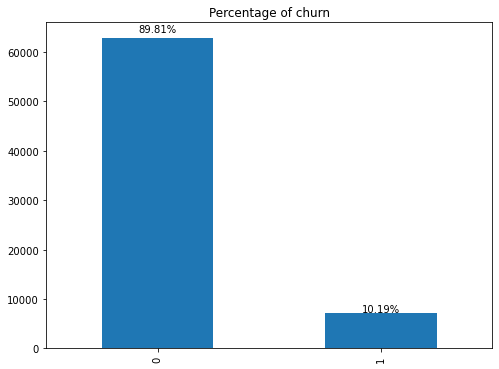

In [187]:
#Percentage of churn in the current data

plt.title("Percentage of churn")
ax = Telecom_df["churn_probability"].value_counts().plot.bar(figsize=[8,6])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{round(height/len(Telecom_df["churn_probability"])*100, 2)}%', xy=(x + width/2, y + height*1.02), ha='center')
plt.show()

In [188]:
#Checking for unwanted rows

Telecom_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [189]:
Telecom_df.tail()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,...,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,...,0,0,NaN,NaN,NaN,712,0.00,0.00,0.00,0
69996,69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,...,0,0,NaN,NaN,NaN,879,0.00,0.00,0.00,0
69997,69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,238.575,245.414,...,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97,0
69998,69998,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,168.269,42.815,...,0,0,1.0,NaN,1.0,1876,0.00,0.00,0.00,0


- There is no Incorrect rows - Header rows, footer rows
- There is no Summary rowsTotal, subtotal rows
- There is no Extra rows,Column numbers, indicators, blank rows

In [190]:
# checking for wrong columns names, missing columns etc.

for i in Telecom_df.columns:
    print(i)

id
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc

- There is no missing columns observed
- There is no Inconsistent column names
- No Unique Identifier
- No Misaligned columns
- There is no Columns containing Multiple data values

### Dropping unwanted columns

In [191]:
# Columns having same value across all records hence droping these

for i in Telecom_df.columns[Telecom_df.nunique() <= 1]:
    print(Telecom_df[i].value_counts())

109    69999
Name: circle_id, dtype: int64
0.0    69297
Name: loc_og_t2o_mou, dtype: int64
0.0    69297
Name: std_og_t2o_mou, dtype: int64
0.0    69297
Name: loc_ic_t2o_mou, dtype: int64
6/30/2014    69999
Name: last_date_of_month_6, dtype: int64
7/31/2014    69600
Name: last_date_of_month_7, dtype: int64
8/31/2014    69266
Name: last_date_of_month_8, dtype: int64
0.0    67231
Name: std_og_t2c_mou_6, dtype: int64
0.0    67312
Name: std_og_t2c_mou_7, dtype: int64
0.0    66296
Name: std_og_t2c_mou_8, dtype: int64
0.0    67231
Name: std_ic_t2o_mou_6, dtype: int64
0.0    67312
Name: std_ic_t2o_mou_7, dtype: int64
0.0    66296
Name: std_ic_t2o_mou_8, dtype: int64


In [192]:
Telecom_df.shape

(69999, 172)

In [193]:
# Dropping columns with signle value

DropCol = Telecom_df.columns[Telecom_df.nunique() <= 1].to_frame().index
Telecom_df.drop(DropCol,axis=1,inplace=True)

In [194]:
Telecom_df.shape

(69999, 159)

In [195]:
# 'Id' doesn't add any value since dropping the same

Telecom_df.drop(['id'],axis=1,inplace=True)

In [196]:
# There are no duplicate records

Telecom_df[Telecom_df.duplicated()]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability


### Null value treatment

In [197]:
# Checking the number of missing values and its percentage
missing_values_count = Telecom_df.isnull().sum().sort_values(ascending = False)
missing_values_perc = (100*Telecom_df.isnull().sum()/Telecom_df.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([missing_values_count,missing_values_perc], axis=1, keys=['Missing Values', 'Missing Values %'])
df_missing_values[df_missing_values['Missing Values %']>50]

,Missing Values,Missing Values %
av_rech_amt_data_6,52431,74.902499
count_rech_3g_6,52431,74.902499
arpu_3g_6,52431,74.902499
arpu_2g_6,52431,74.902499
max_rech_data_6,52431,74.902499
night_pck_user_6,52431,74.902499
count_rech_2g_6,52431,74.902499
date_of_last_rech_data_6,52431,74.902499
total_rech_data_6,52431,74.902499
fb_user_6,52431,74.902499


In [198]:
#columns where we will impute missing values with zeroes

zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8','av_rech_amt_data_6', 
               'av_rech_amt_data_7', 'av_rech_amt_data_8','max_rech_data_6', 'max_rech_data_7', 
               'max_rech_data_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6',
              'fb_user_7','fb_user_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8',
              'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7',
               'count_rech_3g_8']

# impute missing values with 0
Telecom_df[zero_impute] = Telecom_df[zero_impute].apply(lambda x: x.fillna(0))

In [199]:
#Columns where we will impute missing values with median
#All null values for onnet and offnet minutes of usage voice calls has been replaced 
#with median to keep the distribution

mou = ['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']
Telecom_df[mou] = Telecom_df[mou].apply(lambda x: x.fillna(x.median()))

In [200]:
#Columns where we will impute missing values with median
#All null values for outgoing and incoming minutes of usage voice calls has been replaced 
#with median to keep the distribution
ogicarray = []
for i in Telecom_df.columns:
    if 'og' in i or 'ic' in i:
        ogicarray.append(i)
    
for i in ogicarray:
    print(i)
print(len(ogicarray))

Telecom_df[ogicarray] = Telecom_df[ogicarray].apply(lambda x: x.fillna(x.median()))

roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_6
std_ic_t2t_mou_7
std_ic_t2t_mou_8
std_ic_t2m_mou_6
std_ic_t2m_mou_7
std_ic_t2m_mou_8
std_ic_t2f_mou_6
std_ic_t2f_

In [201]:
# Handling dates columns
dates = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
         'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

In [202]:
# checking for null values post treatment

Telecom_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 158 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    arpu_6                    69999 non-null  float64
 1    arpu_7                    69999 non-null  float64
 2    arpu_8                    69999 non-null  float64
 3    onnet_mou_6               69999 non-null  float64
 4    onnet_mou_7               69999 non-null  float64
 5    onnet_mou_8               69999 non-null  float64
 6    offnet_mou_6              69999 non-null  float64
 7    offnet_mou_7              69999 non-null  float64
 8    offnet_mou_8              69999 non-null  float64
 9    roam_ic_mou_6             69999 non-null  float64
 10   roam_ic_mou_7             69999 non-null  float64
 11   roam_ic_mou_8             69999 non-null  float64
 12   roam_og_mou_6             69999 non-null  float64
 13   roam_og_mou_7             69999 non-null  fl

- No null values found

## 2. Filter high value customers

In [203]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
Telecom_df['total_data_rech_6'] = Telecom_df.total_rech_data_6 * Telecom_df.av_rech_amt_data_6
Telecom_df['total_data_rech_7'] = Telecom_df.total_rech_data_7 * Telecom_df.av_rech_amt_data_7

In [204]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
Telecom_df['amt_data_6'] = Telecom_df.total_rech_amt_6 + Telecom_df.total_data_rech_6
Telecom_df['amt_data_7'] = Telecom_df.total_rech_amt_7 + Telecom_df.total_data_rech_7

In [205]:
# calculate average recharge done by customer in June and July
Telecom_df['av_amt_data_6_7'] = (Telecom_df.amt_data_6 + Telecom_df.amt_data_7)/2

In [206]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(Telecom_df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [207]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
Telecom_df_filtered = Telecom_df.loc[Telecom_df.av_amt_data_6_7 >= Telecom_df.av_amt_data_6_7.quantile(0.7), :]
Telecom_df_filtered = Telecom_df_filtered.reset_index(drop=True)
Telecom_df_filtered.shape

(21013, 163)

In [208]:
# delete variables created to filter high-value customers
Telecom_df_filtered = Telecom_df_filtered.drop(['amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)

In [209]:
# Calculating the total for 8th month as well so that we can drop the total_reach_data 
# and av_reach_amt_data for all the months
Telecom_df_filtered['total_data_rech_8'] = Telecom_df_filtered.total_rech_data_8 * Telecom_df_filtered.av_rech_amt_data_8

In [210]:
# dropping the total_reach_data and av_reach_amt_data for all the months
Telecom_df_filtered.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7',
'av_rech_amt_data_8'],axis=1,inplace=True)

In [211]:
Telecom_df_filtered.shape

(21013, 155)

## 3. Outlier treatment

In [212]:
# determinining numeric columns by avoiding those columns with 
# less than or equal to 2 unique values (as these can be considered as catergorical ) and the date fields

numeric_cols = []
for i in Telecom_df_filtered.columns[Telecom_df_filtered.nunique() > 2]:
    if('date' not in i ):
        numeric_cols.append(i)
print(len(numeric_cols))

142


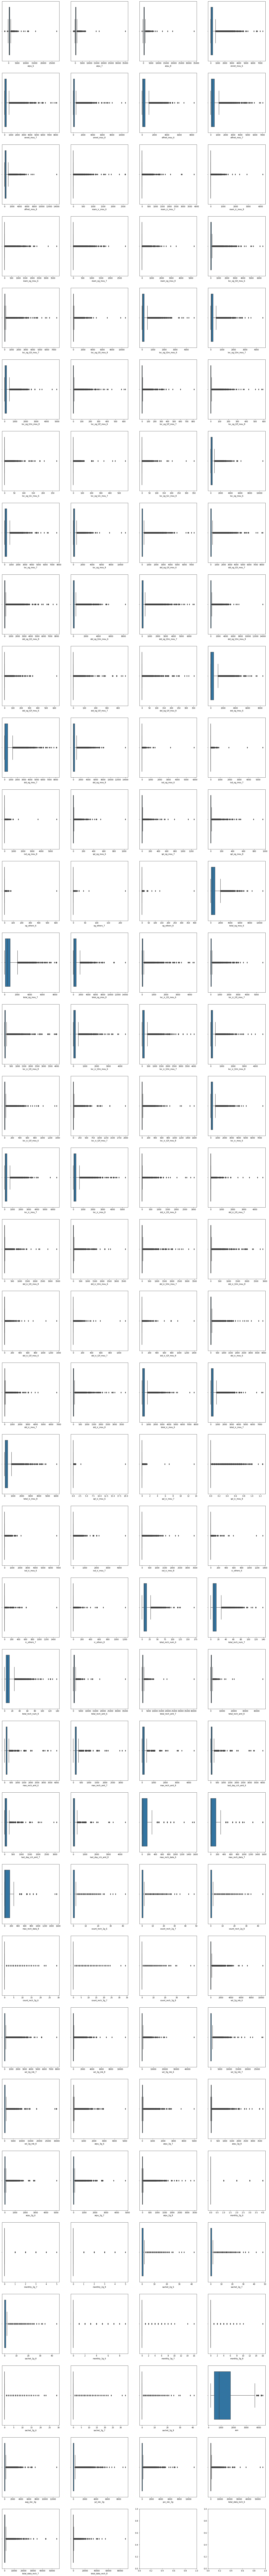

In [213]:
# Box plot to check outliers on numeric columns

fig, axs = plt.subplots(36,4,figsize=(25,250))
j=0
for i in numeric_cols:
    if(j>=4):
        k=j%4
    else:
        k=j
    sns.boxplot(Telecom_df_filtered[i],ax=axs[j//4][k])
    j+=1
fig.show()

In [214]:
# Shape before treating outlier

Telecom_df_filtered.shape

(21013, 155)

#### On checking the outliers from the box plot, removing the outliers using a generic rule for all columns will not work since for each columns the outliers are lying at different percentile, hence the decision was take to remove outlier for some key columns as below.

In [215]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

# cap outliers in the numeric columns
Telecom_df_filtered[numeric_cols] = Telecom_df_filtered[numeric_cols].apply(cap_outliers, axis=0)

In [216]:
# shape post outlier treatment
Telecom_df_filtered.shape

(21013, 155)

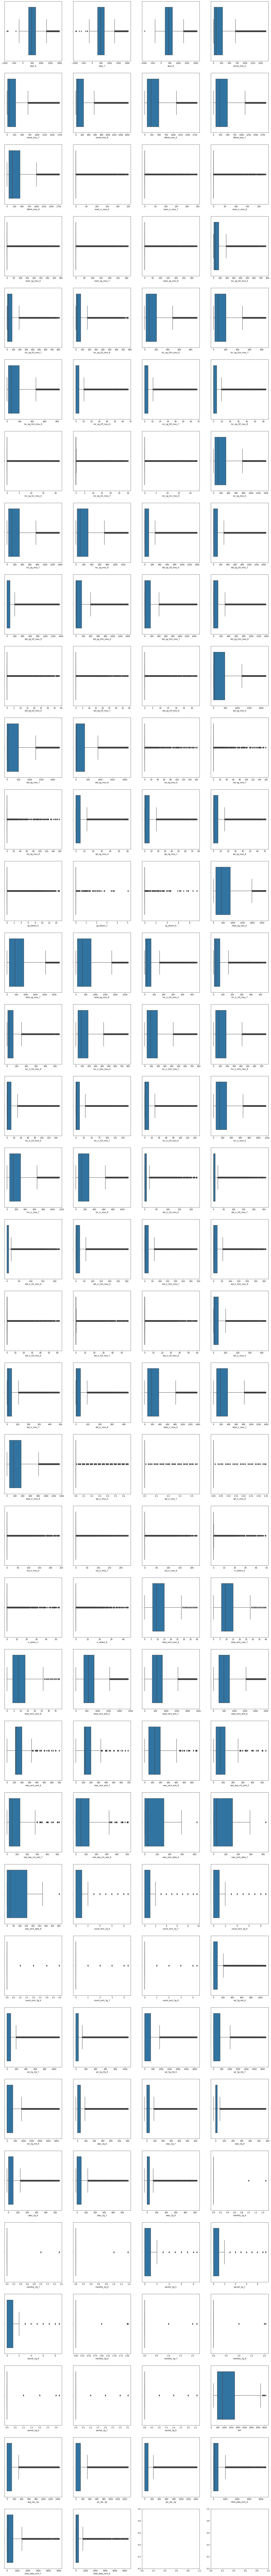

In [217]:
# observing the data after outlier treatment

fig, axs = plt.subplots(36,4,figsize=(25,250))
j=0
for i in numeric_cols:
    if(j>=4):
        k=j%4
    else:
        k=j
    sns.boxplot(Telecom_df_filtered[i],ax=axs[j//4][k])
    j+=1
fig.show()

- After outlier treatment most of the outliers from the key columns have been removed.

## 4. Exploratory Data Analysis/Data Visualization

In [218]:
#Number of churn in the current data representing high value customers

tr0 = go.Bar(
            x = Telecom_df_filtered[Telecom_df_filtered["churn_probability"]== 1]["churn_probability"].value_counts().index.values,
            y = Telecom_df_filtered[Telecom_df_filtered["churn_probability"]== 1]["churn_probability"].value_counts().values,
            name='Churned'
    )

tr1 = go.Bar(
            x = Telecom_df_filtered[Telecom_df_filtered["churn_probability"]== 0]["churn_probability"].value_counts().index.values,
            y = Telecom_df_filtered[Telecom_df_filtered["churn_probability"]== 0]["churn_probability"].value_counts().values,
            name='Not Churned'
    )

data = [tr0, tr1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='churn_probability Variable'
    ),
    title='Chrun probability variable distribution'
)

fig = go.Figure(data=data, layout=layout)


py.iplot(fig, filename='grouped-bar')

### A. Univariate Analysis

In [219]:
# quantitative variables
print(len(numeric_cols))

142


In [220]:
# Spliting the numeric columns into outgoing, incoming, data and others related columns for analysis

ogCols = []
icCols = []
dataCols = []
otherCols = []
for i in numeric_cols:
    if 'og' in i:
        ogCols.append(i)
    elif 'ic' in i:
        icCols.append(i)
    elif 'data' in i or '2g' in i or '3g' in i:
        dataCols.append(i)
    else:
        otherCols.append(i)

print(len(ogCols))
print(len(icCols))
print(len(dataCols))
print(len(otherCols))
    

42
39
39
22


#### We will visualize the distribution each feature using histogram

#### Outgoing call minutes analysis

<AxesSubplot:xlabel='roam_og_mou_6', ylabel='Count'>

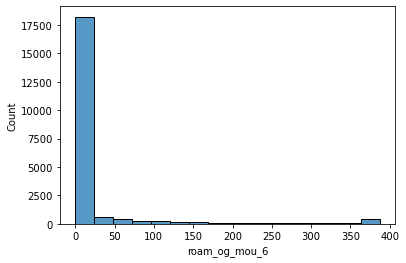

In [221]:
sns.histplot(Telecom_df_filtered['roam_og_mou_6'])

Total Sum for 6 = 444516.2672927716
Total Sum for 7 = 318973.46950829355
Total Sum for 8 = 305218.63166585553


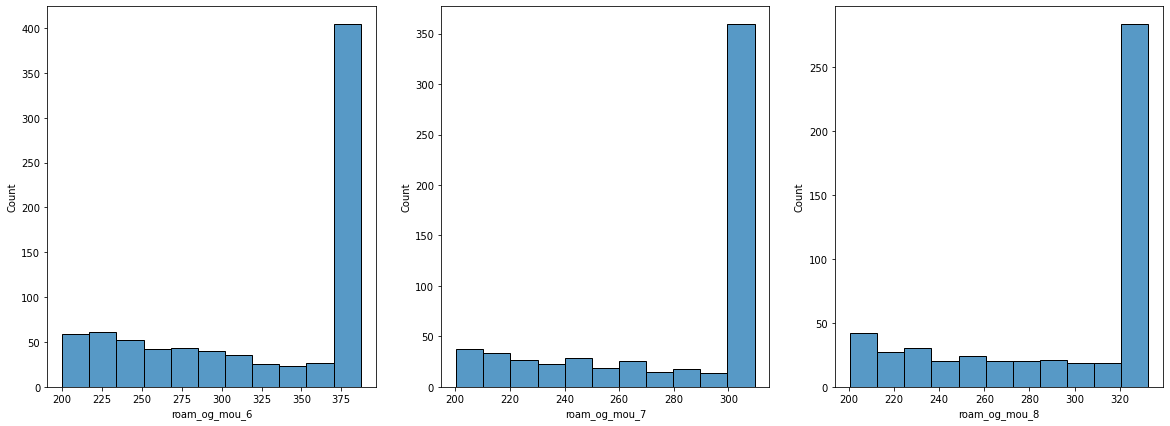

In [222]:
# roaming outgoing minutes greater than 200 as below that the values are same across the months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['roam_og_mou_6']>=200.0]['roam_og_mou_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['roam_og_mou_7']>=200.0]['roam_og_mou_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['roam_og_mou_8']>=200.0]['roam_og_mou_8'],ax=axs[2])
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['roam_og_mou_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['roam_og_mou_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['roam_og_mou_8'].sum()))

- Total roaming outgoing call reduced for month 7 and 8 compared to month 6

Total Sum for 6 = 1536372.012370109
Total Sum for 7 = 1549913.185924259
Total Sum for 8 = 1429332.8175312611


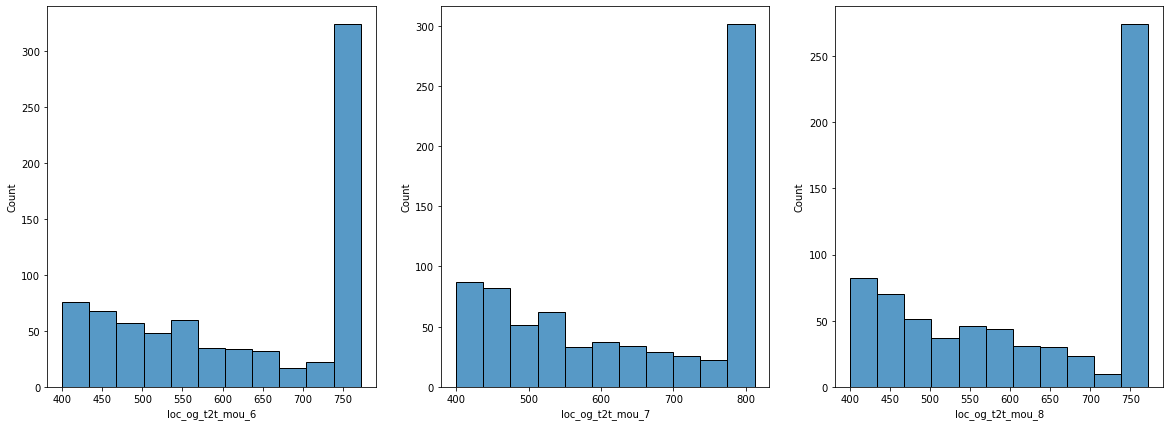

In [223]:
# loc_og_t2t_mou greater than 400, as below that the values are same across the months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['loc_og_t2t_mou_6']>=400.0]['loc_og_t2t_mou_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['loc_og_t2t_mou_7']>=400.0]['loc_og_t2t_mou_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['loc_og_t2t_mou_8']>=400.0]['loc_og_t2t_mou_8'],ax=axs[2])
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['loc_og_t2t_mou_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['loc_og_t2t_mou_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['loc_og_t2t_mou_8'].sum()))

- Here we can see a sligh increase from month 6 to 7 and a dip towards month 8 by appx 1.5L min

Total Sum for 6 = 3257227.278310962
Total Sum for 7 = 3243726.8707355214
Total Sum for 8 = 3032585.051429081


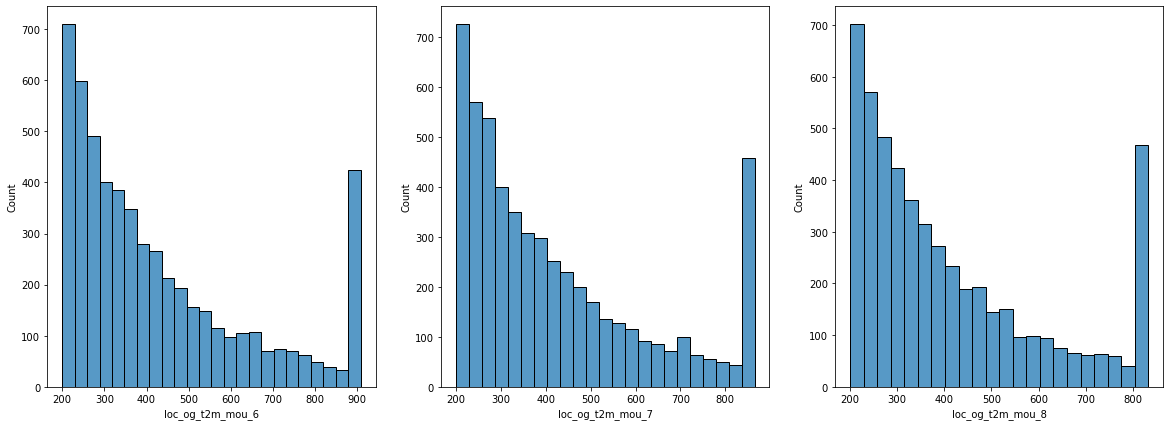

In [224]:
# loc_og_t2m_mou greater than 200, as below that the values are same across the months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['loc_og_t2m_mou_6']>=200.0]['loc_og_t2m_mou_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['loc_og_t2m_mou_7']>=200.0]['loc_og_t2m_mou_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['loc_og_t2m_mou_8']>=200.0]['loc_og_t2m_mou_8'],ax=axs[2])
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['loc_og_t2m_mou_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['loc_og_t2m_mou_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['loc_og_t2m_mou_8'].sum()))

- For month 6 and 7 the total number of min is almost same, and we could see a reduction of 2L min for month 8

Total Sum for 6 = 112512.94062812586
Total Sum for 7 = 114237.2625100593
Total Sum for 8 = 105412.02849728396


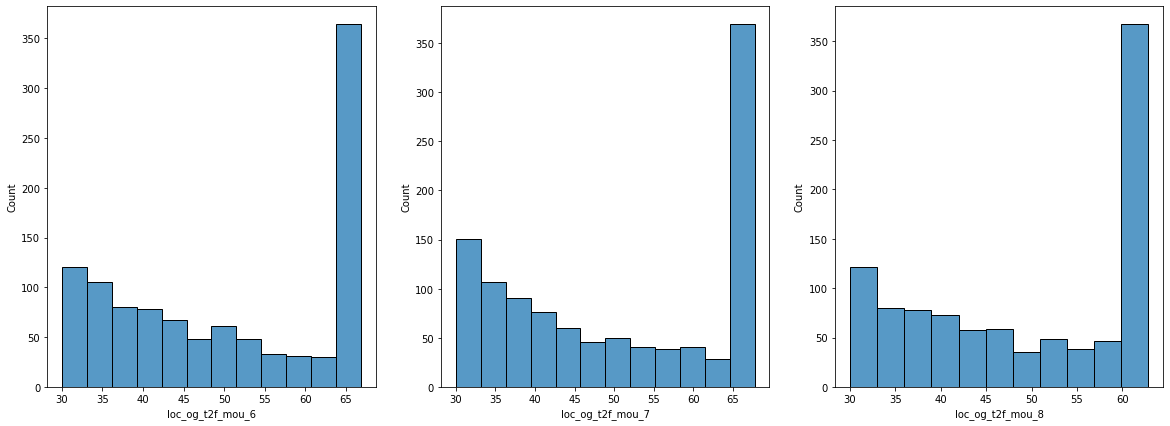

In [225]:
# loc_og_t2f_mou greater than 30, as below that the values are same across the months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['loc_og_t2f_mou_6']>=30.0]['loc_og_t2f_mou_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['loc_og_t2f_mou_7']>=30.0]['loc_og_t2f_mou_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['loc_og_t2f_mou_8']>=30.0]['loc_og_t2f_mou_8'],ax=axs[2])
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['loc_og_t2f_mou_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['loc_og_t2f_mou_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['loc_og_t2f_mou_8'].sum()))

- Here we can see a slight increase from month 6 to 7 and a dip towards month 8

Total Sum for 6 = 27724.01833906767
Total Sum for 7 = 32958.991925940994
Total Sum for 8 = 29548.230293115845


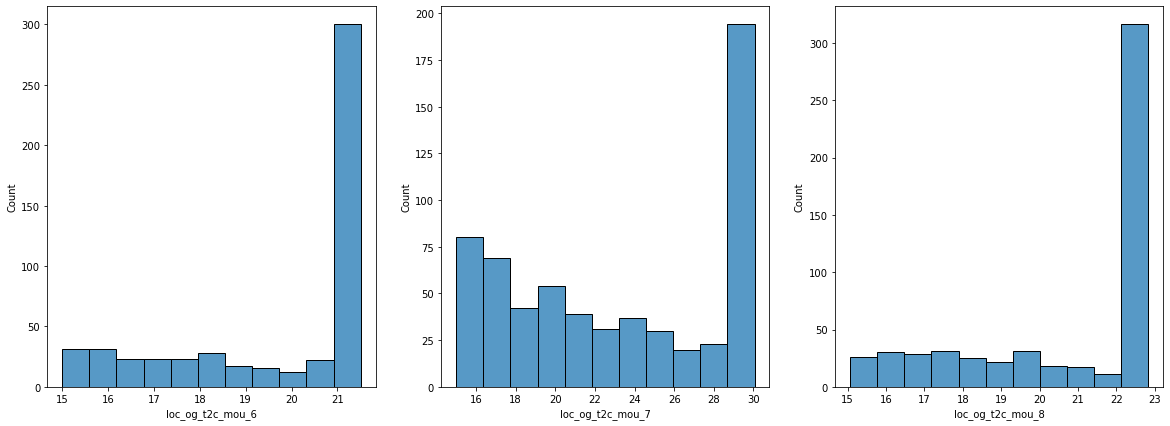

In [226]:
# loc_og_t2c_mou greater than 15, as below that the values are same across the months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['loc_og_t2c_mou_6']>=15.0]['loc_og_t2c_mou_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['loc_og_t2c_mou_7']>=15.0]['loc_og_t2c_mou_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['loc_og_t2c_mou_8']>=15.0]['loc_og_t2c_mou_8'],ax=axs[2])
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['loc_og_t2c_mou_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['loc_og_t2c_mou_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['loc_og_t2c_mou_8'].sum()))

- We could see an increase from month 6 to 7 and a decrese in month 8

Total Sum for 6 = 5068344.245164545
Total Sum for 7 = 5067480.29712454
Total Sum for 8 = 4717321.435714409


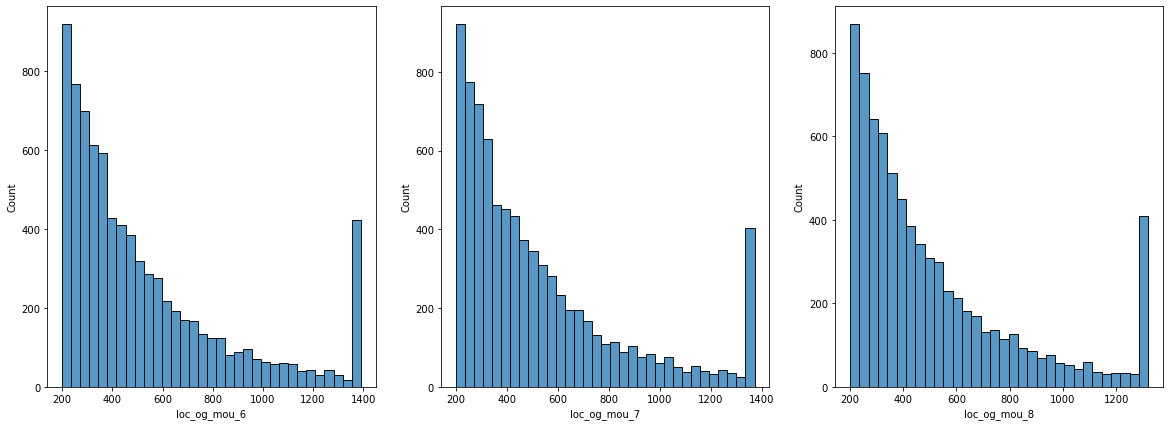

In [227]:
# loc_og_mou greater than 200, as below that the values are same across the months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['loc_og_mou_6']>=200.0]['loc_og_mou_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['loc_og_mou_7']>=200.0]['loc_og_mou_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['loc_og_mou_8']>=200.0]['loc_og_mou_8'],ax=axs[2])
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['loc_og_mou_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['loc_og_mou_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['loc_og_mou_8'].sum()))

- We can see a reduction in total local outgoing minutes for month 8

Total Sum for 6 = 3192354.196587602
Total Sum for 7 = 3333723.0473527233
Total Sum for 8 = 2777482.9411911303


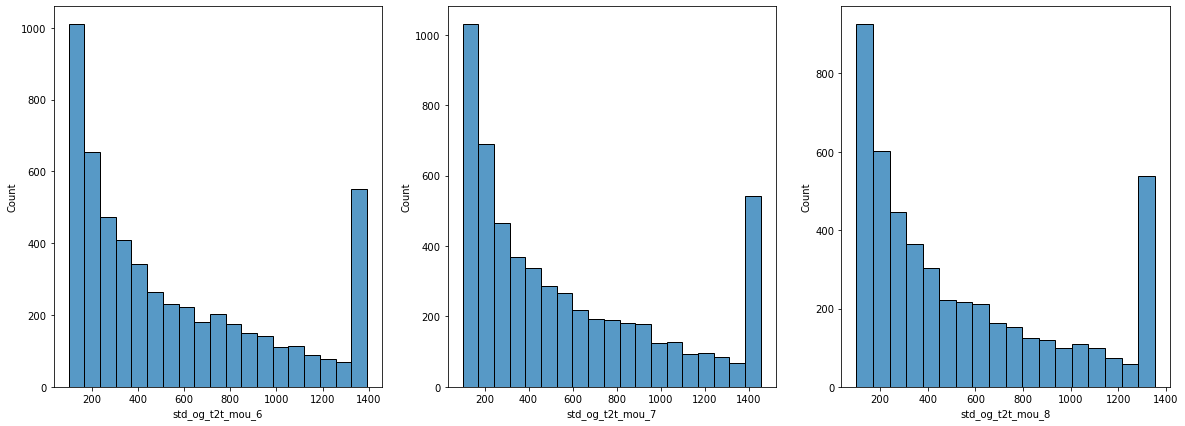

In [228]:
# std_og_t2t_mou greater than 100, as below that the values are same across the months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['std_og_t2t_mou_6']>=100.0]['std_og_t2t_mou_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['std_og_t2t_mou_7']>=100.0]['std_og_t2t_mou_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['std_og_t2t_mou_8']>=100.0]['std_og_t2t_mou_8'],ax=axs[2])
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['std_og_t2t_mou_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['std_og_t2t_mou_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['std_og_t2t_mou_8'].sum()))

- We can see a decrease in month 8 compared to 6 and 7

Total Sum for 6 = 3481222.569869023
Total Sum for 7 = 3613874.365855539
Total Sum for 8 = 2995829.9612479964


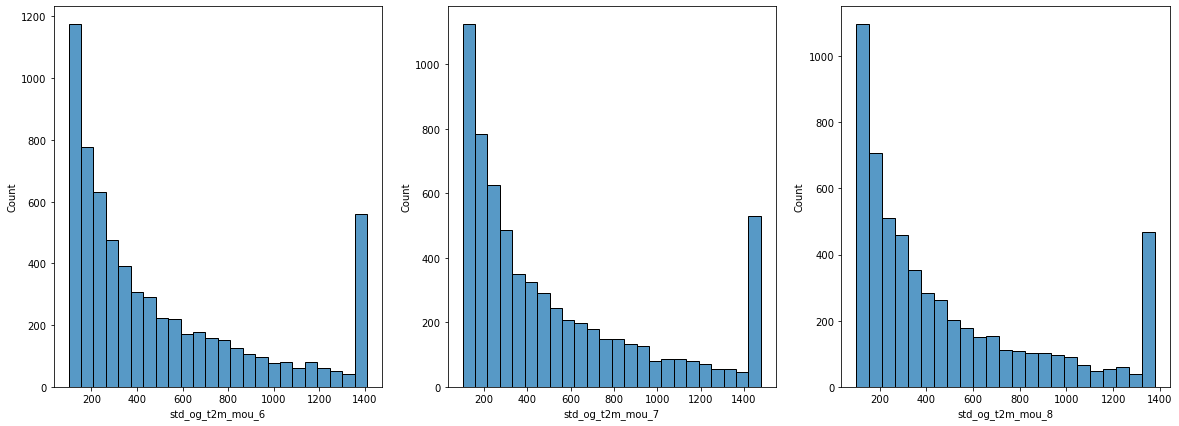

In [229]:
# std_og_t2m_mou greater than 100, as below that the values are same across the months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['std_og_t2m_mou_6']>=100.0]['std_og_t2m_mou_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['std_og_t2m_mou_7']>=100.0]['std_og_t2m_mou_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['std_og_t2m_mou_8']>=100.0]['std_og_t2m_mou_8'],ax=axs[2])
fig.show()


print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['std_og_t2m_mou_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['std_og_t2m_mou_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['std_og_t2m_mou_8'].sum()))

- We can see a decrease in month 8 compared to 6 and 7

Total Sum for 6 = 26035.390106618754
Total Sum for 7 = 24835.00951331261
Total Sum for 8 = 22217.783606478093


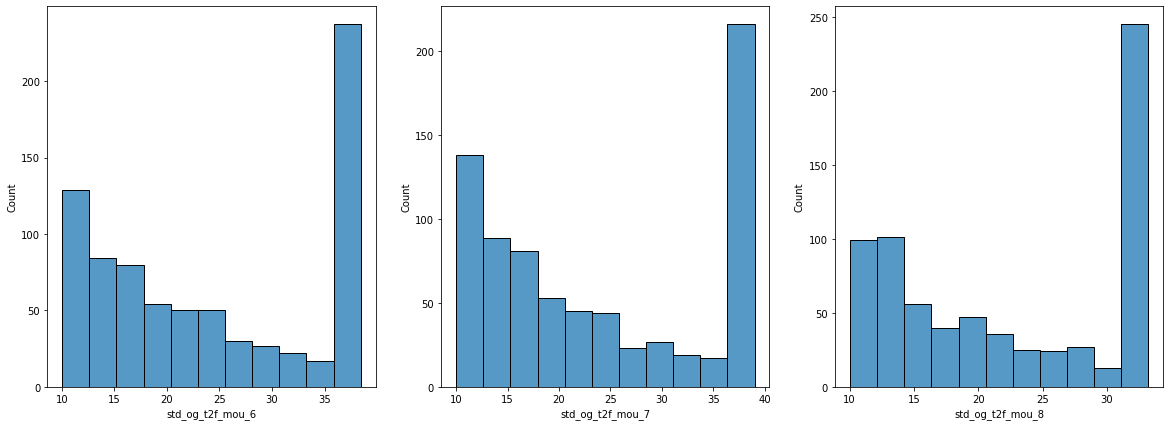

In [230]:
# std_og_t2f_mou greater than 10, as below that the values are same across the months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['std_og_t2f_mou_6']>=10.0]['std_og_t2f_mou_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['std_og_t2f_mou_7']>=10.0]['std_og_t2f_mou_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['std_og_t2f_mou_8']>=10.0]['std_og_t2f_mou_8'],ax=axs[2])
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['std_og_t2f_mou_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['std_og_t2f_mou_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['std_og_t2f_mou_8'].sum()))

- We can see an reduction in the STD outgoing minutes t2f on months 7 and 8 compared to 6

Total Sum for 6 = 7038876.945532979
Total Sum for 7 = 7310267.231842254
Total Sum for 8 = 6103661.373074258


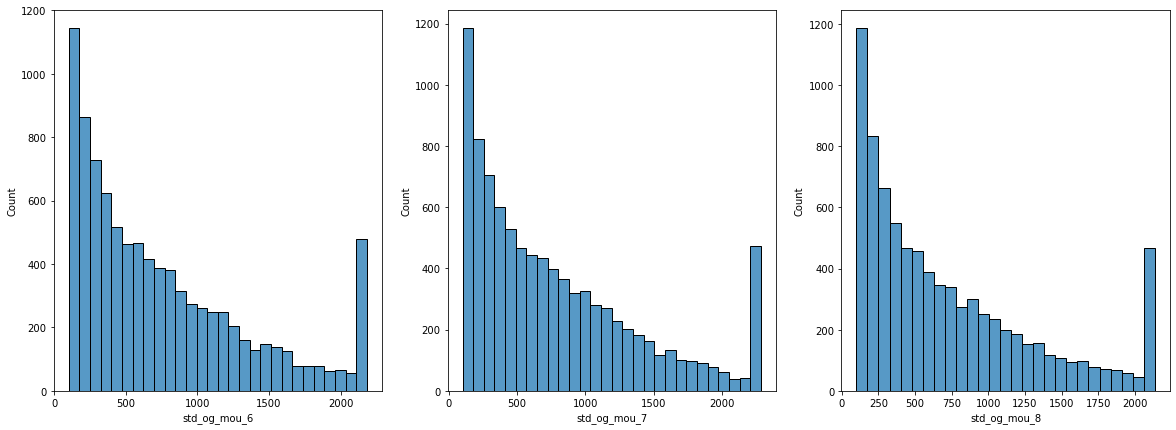

In [231]:
# std_og_mou greater than 100, as below that the values are same across the months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['std_og_mou_6']>=100.0]['std_og_mou_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['std_og_mou_7']>=100.0]['std_og_mou_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['std_og_mou_8']>=100.0]['std_og_mou_8'],ax=axs[2])
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['std_og_mou_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['std_og_mou_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['std_og_mou_8'].sum()))

- We can observe an increase from 6 to 7 and a reduction from 7 to 8

Total Sum for 6 = 28270.054066395627
Total Sum for 7 = 27516.571559048825
Total Sum for 8 = 24438.343876194253


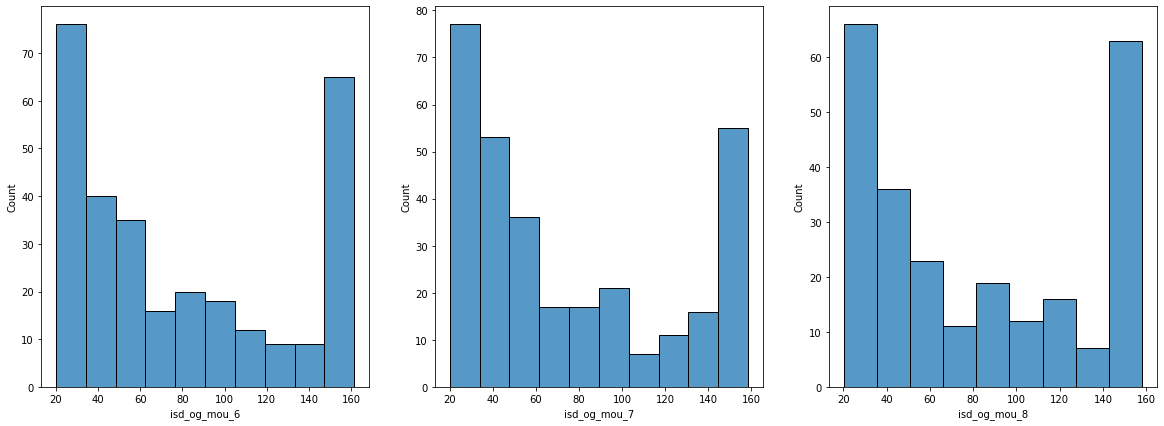

In [232]:
# isd_og_mou greater than 20, as below that the values are same across the months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['isd_og_mou_6']>=20.0]['isd_og_mou_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['isd_og_mou_7']>=20.0]['isd_og_mou_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['isd_og_mou_8']>=20.0]['isd_og_mou_8'],ax=axs[2])
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['isd_og_mou_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['isd_og_mou_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['isd_og_mou_8'].sum()))

- No significant change in the minutes across month 6 and 7 but can observe some reduction in month 8

Total Sum for 6 = 109070.72692345726
Total Sum for 7 = 133658.6365803218
Total Sum for 8 = 122583.59521423352


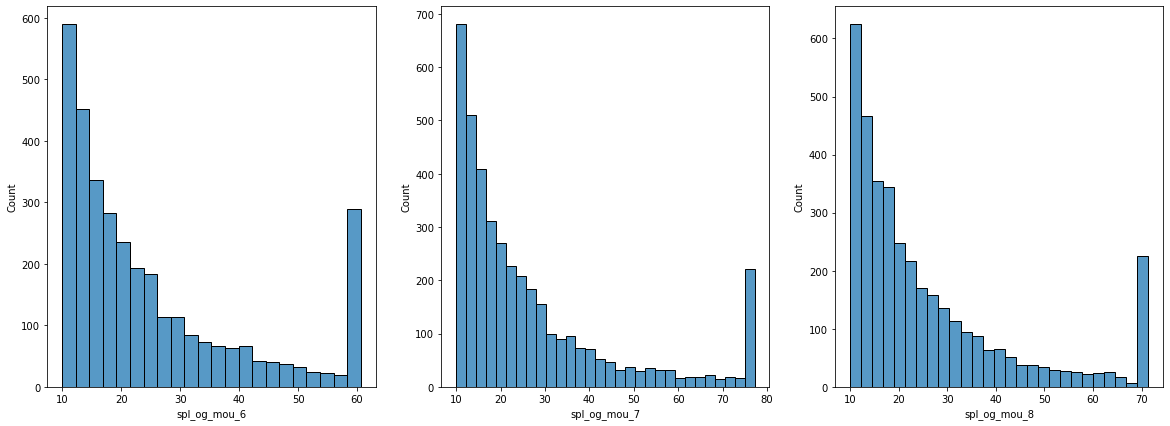

In [233]:
# spl_og_mou greater than 10, as below that the values are same across the months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['spl_og_mou_6']>=10.0]['spl_og_mou_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['spl_og_mou_7']>=10.0]['spl_og_mou_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['spl_og_mou_8']>=10.0]['spl_og_mou_8'],ax=axs[2])
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['spl_og_mou_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['spl_og_mou_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['spl_og_mou_8'].sum()))

- There is an increase in the number of minutes from 6 to 7 and a slight reduction in month 8

Total Sum for 6 = 13053.390472000532
Total Sum for 7 = 215.37428441784533
Total Sum for 8 = 361.5968468820457


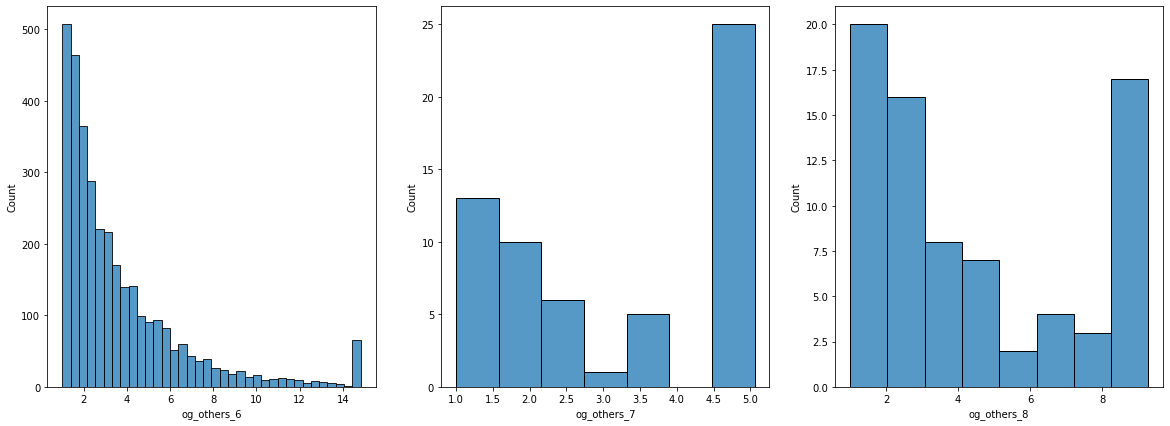

In [234]:
# og_others greater than 1, as below that the values are same across the months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['og_others_6']>=1.0]['og_others_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['og_others_7']>=1.0]['og_others_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['og_others_8']>=1.0]['og_others_8'],ax=axs[2])
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['og_others_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['og_others_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['og_others_8'].sum()))

- There is significant reduction in the minutes for months 7 and 8 compared to month 6

Total Sum for 6 = 12554236.1062935
Total Sum for 7 = 12833328.478451092
Total Sum for 8 = 11211318.579702491


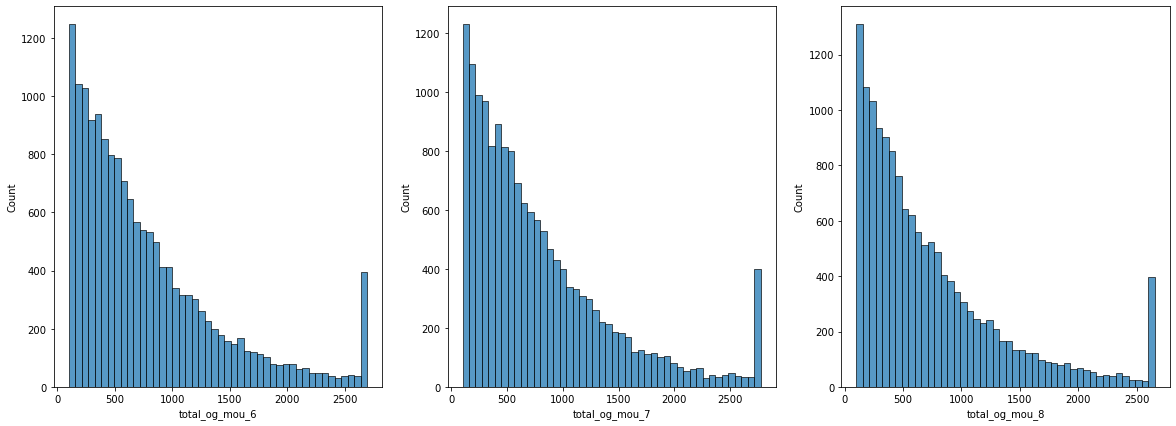

In [235]:
# total_og_mou greater than 100, as below that the values are same across the months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['total_og_mou_6']>=100.0]['total_og_mou_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['total_og_mou_7']>=100.0]['total_og_mou_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['total_og_mou_8']>=100.0]['total_og_mou_8'],ax=axs[2])
fig.show()


print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['total_og_mou_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['total_og_mou_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['total_og_mou_8'].sum()))

- From all the above observations related to outgoing minutes, most of them are showing an increase from month 6 to 7 and then a reduction towards month 8
- Hence in the total as well we can see an increase in month 7 and reduction in month 8

#### Incoming call minutes analysis

In [236]:
def comp_month_histplot(column_name, min_value):
	fig, axs = plt.subplots(1,3,figsize=(20,7))
	sns.histplot(Telecom_df_filtered[Telecom_df_filtered[column_name+'_6']>=min_value][column_name+'_6'],ax=axs[0])
	sns.histplot(Telecom_df_filtered[Telecom_df_filtered[column_name+'_7']>=min_value][column_name+'_7'],ax=axs[1])
	sns.histplot(Telecom_df_filtered[Telecom_df_filtered[column_name+'_8']>=min_value][column_name+'_8'],ax=axs[2])
	fig.show()

	print('Total Sum for 6 = {0}'.format(Telecom_df_filtered[column_name+'_6'].sum()))
	print('Total Sum for 7 = {0}'.format(Telecom_df_filtered[column_name+'_7'].sum()))
	print('Total Sum for 8 = {0}'.format(Telecom_df_filtered[column_name+'_8'].sum()))

Total Sum for 6 = 260622.4021781443
Total Sum for 7 = 196801.7230299223
Total Sum for 8 = 187704.06691774615


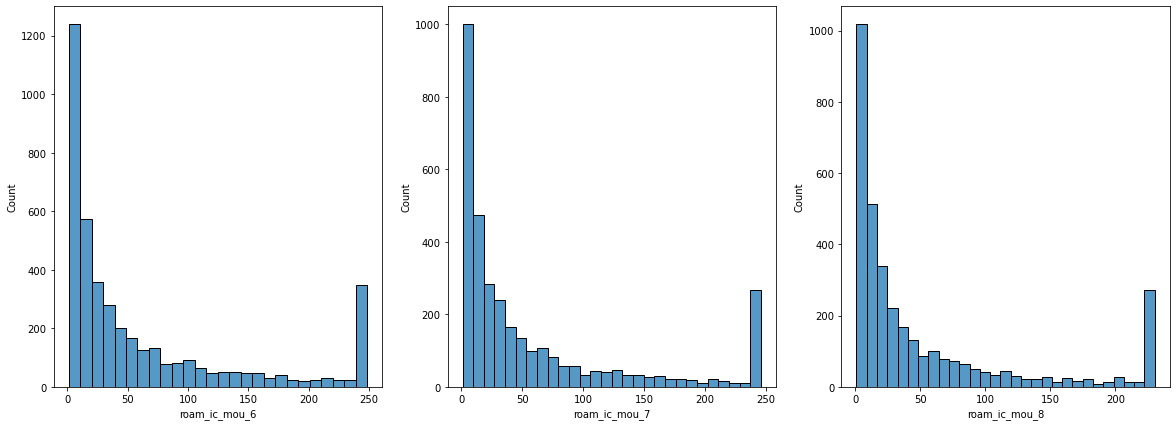

In [237]:
# roaming incoming minutes greater than 1 as below that the values are same across the months

comp_month_histplot('roam_ic_mou',1)

- We see major decrease in roaming incoming minutes from June to July and slight increase from July to August

Total Sum for 6 = 1222377.372197535
Total Sum for 7 = 1234394.660897797
Total Sum for 8 = 1174127.7218114925


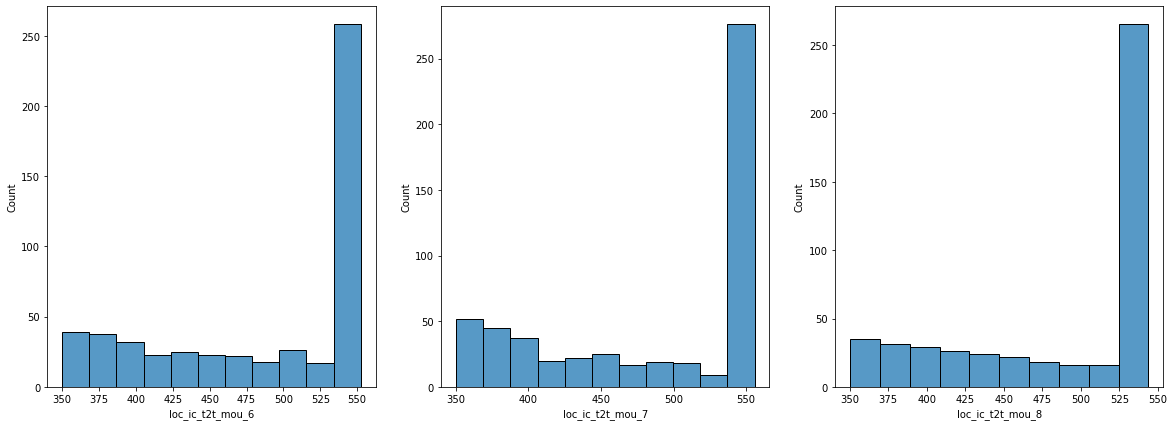

In [238]:
# loc_ic_t2t_mou greater than 350, as below that the values are same across the months

comp_month_histplot('loc_ic_t2t_mou',350)

- We see an increase in local incoming t2t from June to July and a decrease in August

Total Sum for 6 = 3001347.3094308563
Total Sum for 7 = 3004650.301927127
Total Sum for 8 = 2937224.8543447815


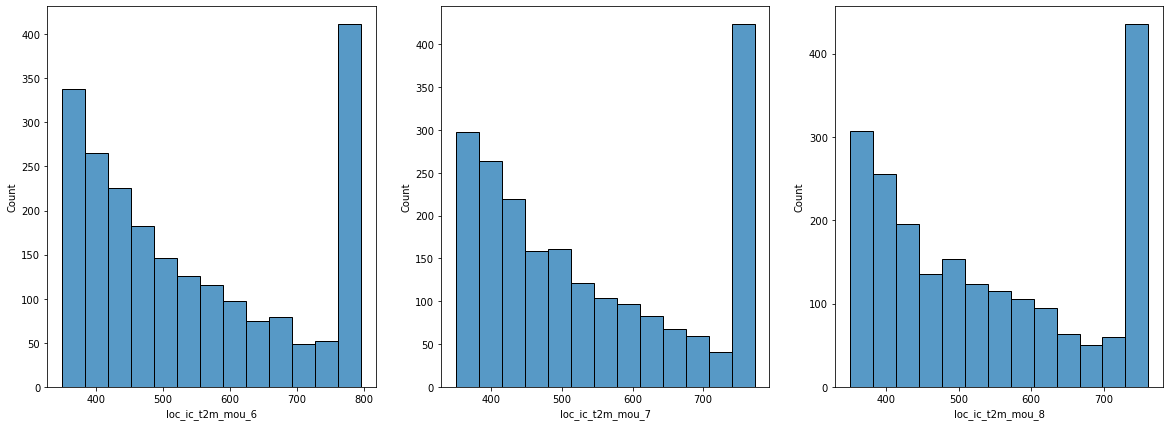

In [239]:
# loc_ic_t2m_mou greater than 200, as below that the values are same across the months

comp_month_histplot('loc_ic_t2m_mou',350)

- We see decreasing trend across months

Total Sum for 6 = 280202.61197480897
Total Sum for 7 = 294307.2715991319
Total Sum for 8 = 265156.7393470836


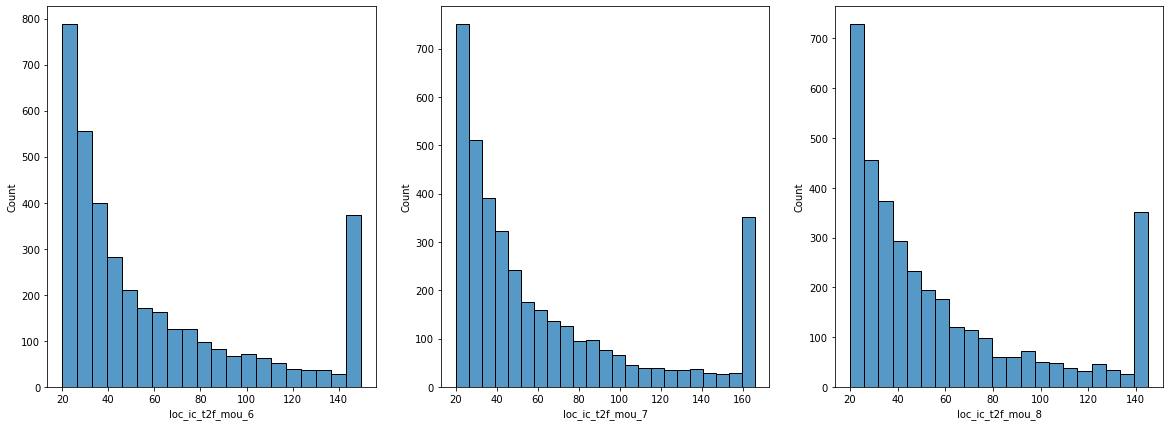

In [240]:
# loc_ic_t2f_mou greater than 30, as below that the values are same across the months

comp_month_histplot('loc_ic_t2f_mou',20)

- We see decreasing trend across months

Total Sum for 6 = 4643276.478703867
Total Sum for 7 = 4675773.414744386
Total Sum for 8 = 4518946.28796715


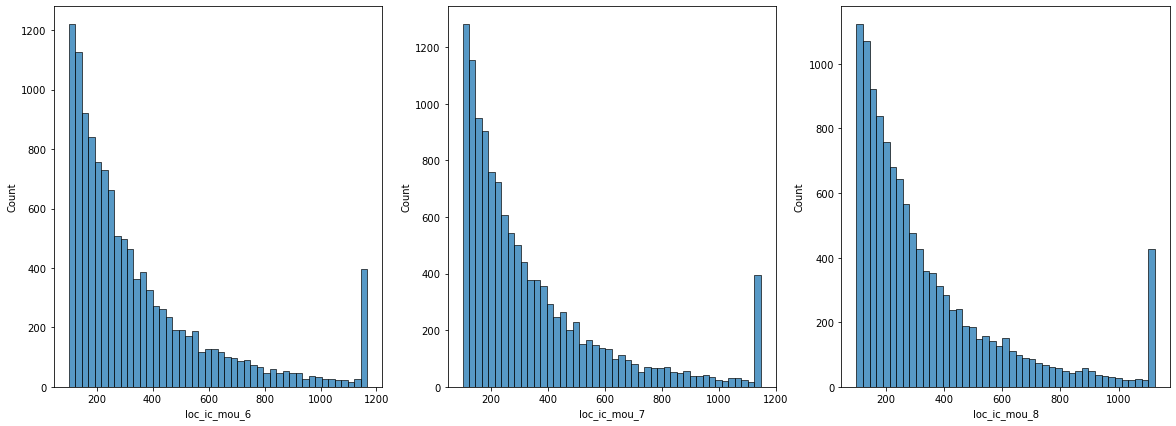

In [241]:
# loc_ic_mou greater than 200, as below that the values are same across the months

comp_month_histplot('loc_ic_mou',100)

- We see a slight increase in July from June and a slight decline in August

Total Sum for 6 = 244110.05225385592
Total Sum for 7 = 260876.34650947648
Total Sum for 8 = 231942.59900537622


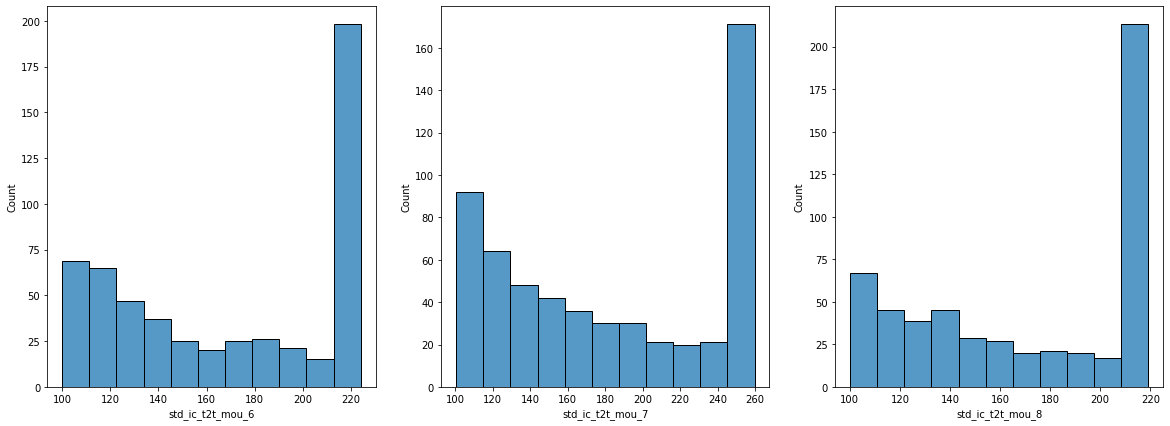

In [242]:
# std_ic_t2t_mou greater than 100, as below that the values are same across the months
comp_month_histplot('std_ic_t2t_mou',100)

- We see a decrease from June to July and increase from July to August

Total Sum for 6 = 519841.28715351946
Total Sum for 7 = 544358.8396127743
Total Sum for 8 = 489588.946591784


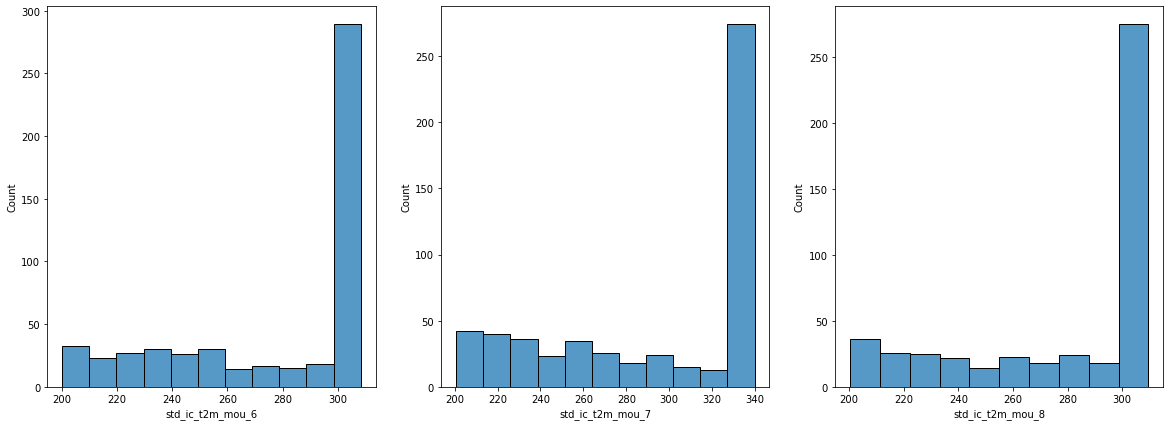

In [243]:
# std_ic_t2m_mou greater than 100, as below that the values are same across the months
comp_month_histplot('std_ic_t2m_mou',200)

- We see an increase from June to July but a drastic decrease from July to August 

Total Sum for 6 = 43114.714341584964
Total Sum for 7 = 44469.928228278346
Total Sum for 8 = 40111.41047853401


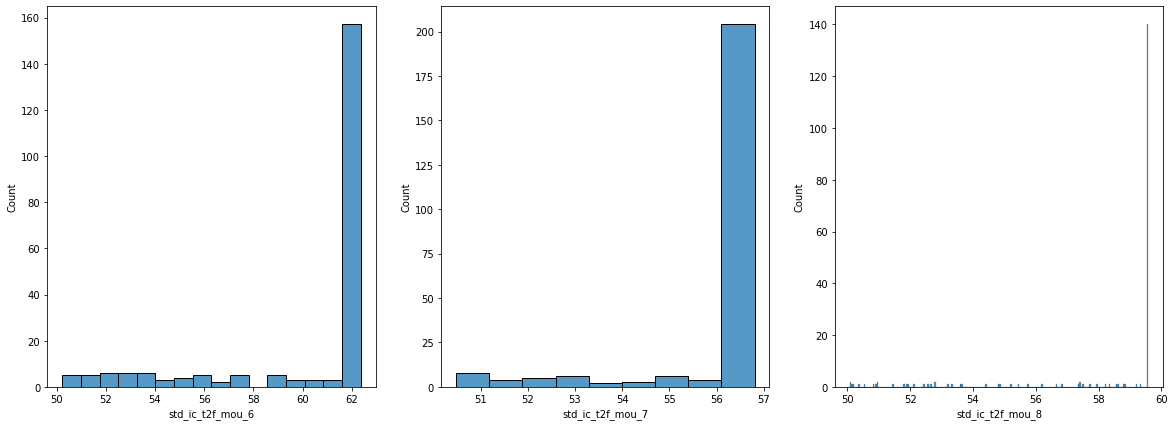

In [244]:
# std_ic_t2f_mou greater than 10, as below that the values are same across the months
comp_month_histplot('std_ic_t2f_mou',50)

- We see an increase from June to July but a drastic decrease from July to August 

Total Sum for 6 = 844098.6967446215
Total Sum for 7 = 889569.5215511365
Total Sum for 8 = 797241.3699379701


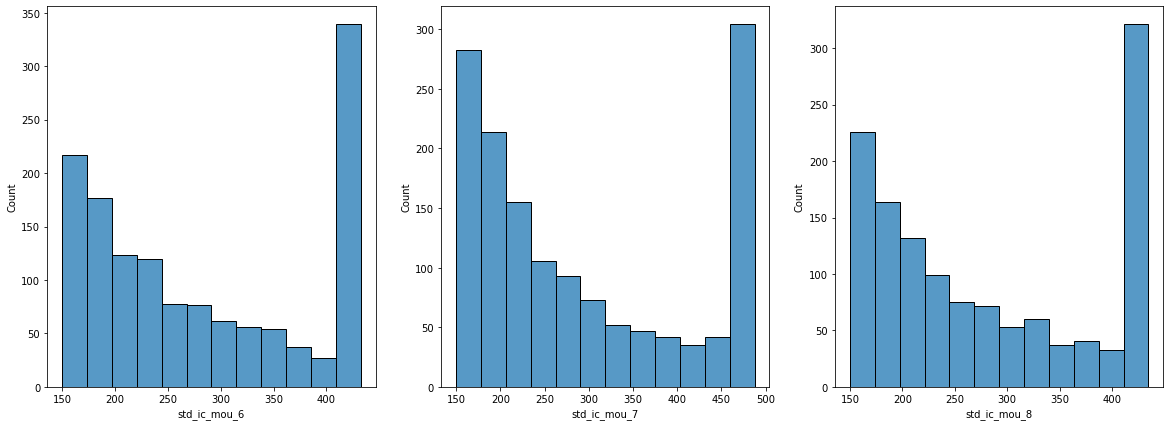

In [245]:
# std_ic_mou greater than 100, as below that the values are same across the months
comp_month_histplot('std_ic_mou',150)

- We see an increase from June to July but a decrease from July to August 

Total Sum for 6 = 161903.78705238737
Total Sum for 7 = 173920.99165299663
Total Sum for 8 = 162278.8770547237


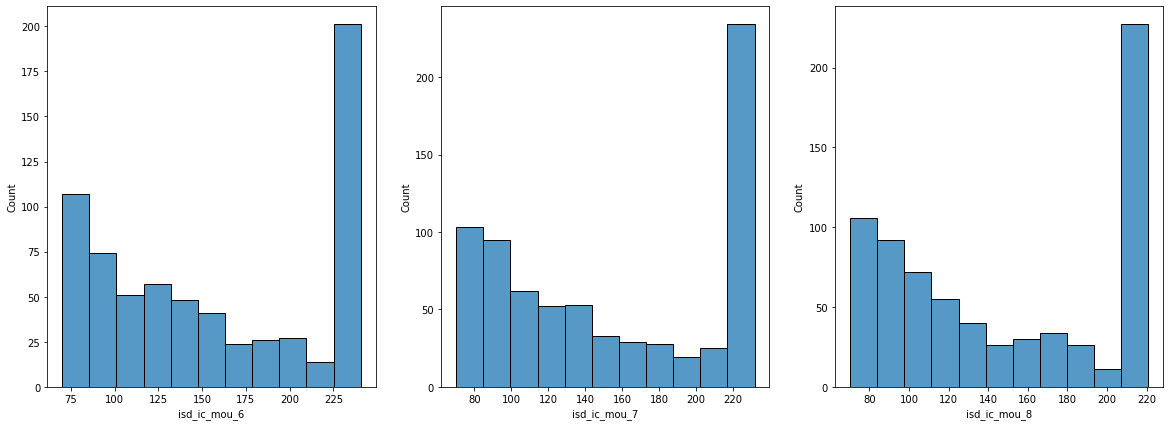

In [246]:
# isd_ic_mou greater than 20, as below that the values are same across the months
comp_month_histplot('isd_ic_mou',70)

- We see a slight increase from June to July and remains consistent for August

Total Sum for 6 = 1257.1742060291854
Total Sum for 7 = 323.6391851171439
Total Sum for 8 = 445.3594995528083


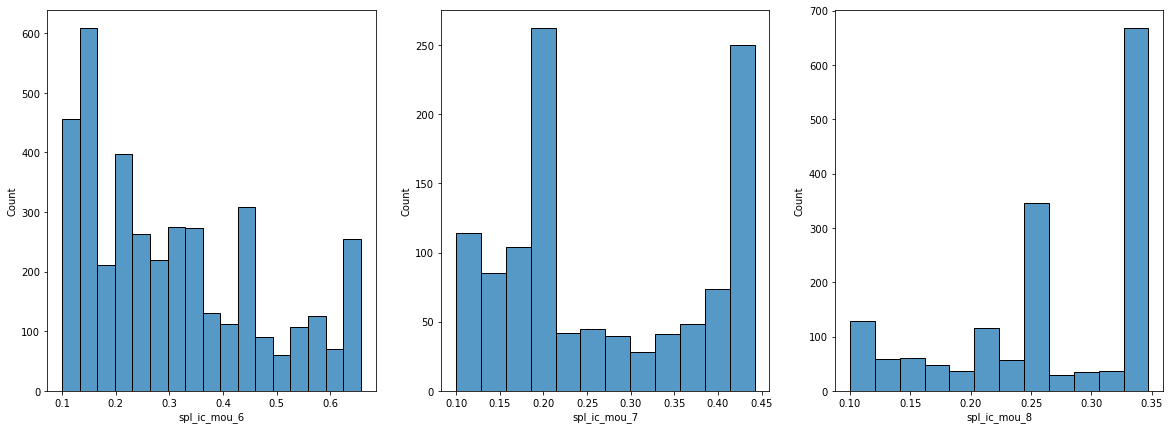

In [247]:
# spl_ic_mou greater than 0, as below that the values are same across the months
comp_month_histplot('spl_ic_mou',0.1)

- We see a drastic decrease from June to July and a slight increase in August

Total Sum for 6 = 17544.23371048523
Total Sum for 7 = 21452.30473114292
Total Sum for 8 = 18082.85294575873


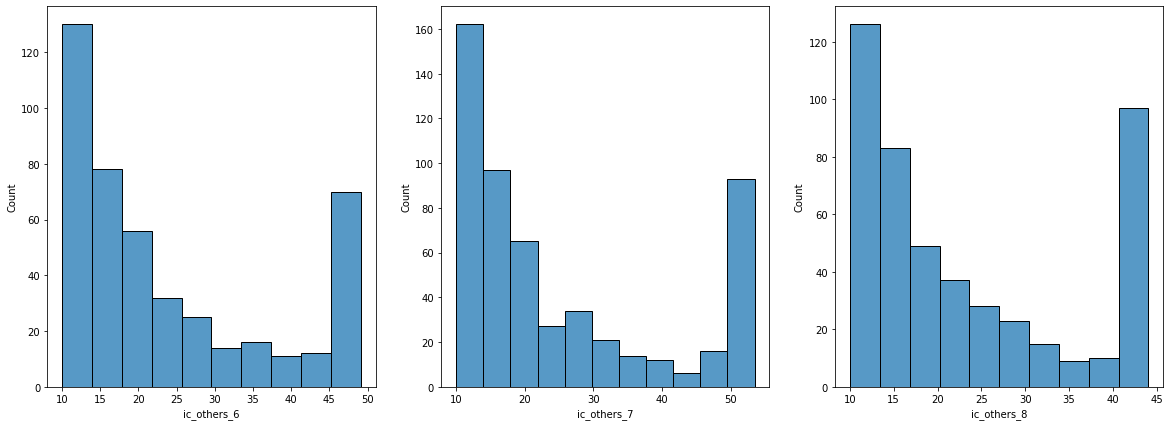

In [248]:
# ic_others greater than 1, as below that the values are same across the months
comp_month_histplot('ic_others',10)

- We see an increase from June to July but a decrease in August

Total Sum for 6 = 5802854.741466824
Total Sum for 7 = 5902964.807447256
Total Sum for 8 = 5592633.296662423


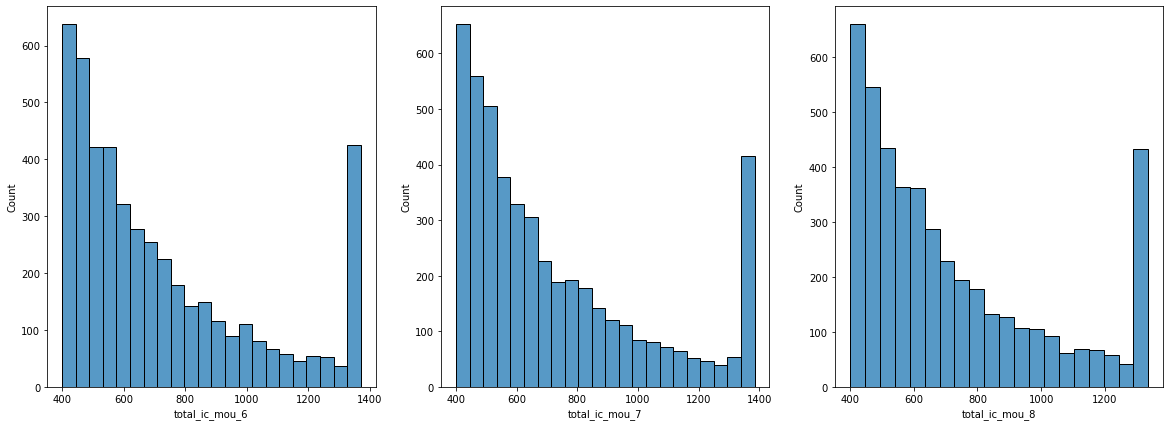

In [249]:
# total_ic_mou greater than 100, as below that the values are same across the months
comp_month_histplot('total_ic_mou',400)

- We see a slight increase from June to July and decrease in August

#### Date analysis

In [250]:
def date_formatting(date_value_counts):
    last_rech_date = pd.DataFrame()
    last_rech_date['Date'] = date_value_counts.index
    last_rech_date['Count'] = date_value_counts.values
    last_rech_date['Date'] = last_rech_date.apply(lambda x: x.Date.split('/')[1],axis=1)
    last_rech_date['Date'] = last_rech_date.apply(lambda x: int(x.Date),axis=1)
    last_rech_date.sort_values(by=['Date'], ascending=False)
    return last_rech_date

def date_analysis(column_name):
    mon_6_data = date_formatting(Telecom_df_filtered[column_name+'_6'].value_counts())
    sns.lineplot(data = mon_6_data, x='Date', y='Count', label="June")
    mon_7_data = date_formatting(Telecom_df_filtered[column_name+'_7'].value_counts())
    sns.lineplot(data = mon_7_data, x='Date', y='Count', label="July")
    mon_8_data = date_formatting(Telecom_df_filtered[column_name+'_8'].value_counts())
    sns.lineplot(data = mon_8_data, x='Date', y='Count', label="August")
    fig.show()

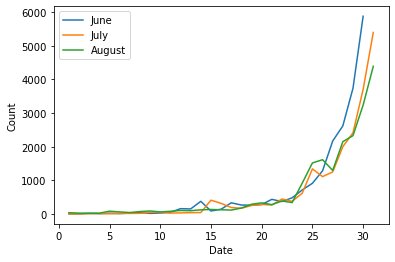

In [251]:
date_analysis('date_of_last_rech')

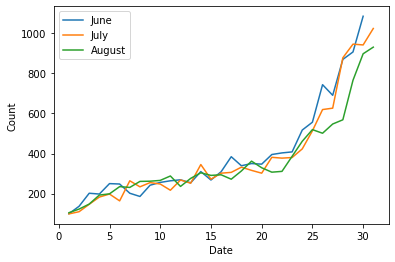

In [252]:
date_analysis('date_of_last_rech_data')

- We see decreasing trend in number of recharges happening
- Max number of recharges happen during the end of the month
- Sudden spike in normal recharges during end of month
- Relatively gradual increase in data recharges with max happening at the end of the month

#### Data related columns analysis

Total Sum for 6 = 24138.216634949757
Total Sum for 7 = 27636.238477164963
Total Sum for 8 = 23479.355042001072


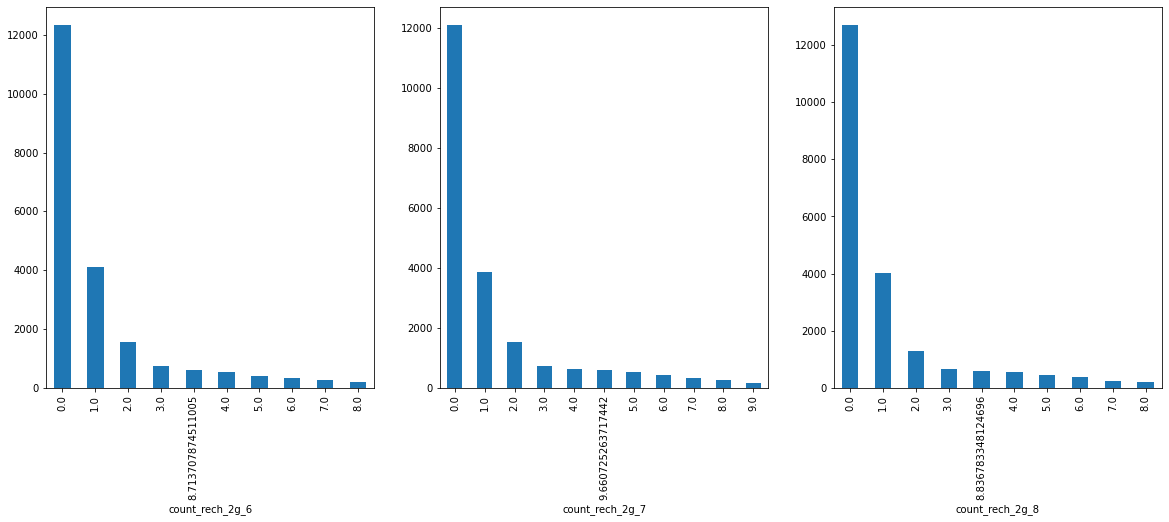

In [253]:
#count_rech_2g across months 6,7 and 8
fig, axs = plt.subplots(1,3,figsize=(20,7))
Telecom_df_filtered.count_rech_2g_6.sort_values().value_counts().plot.bar(ax = axs[0])
Telecom_df_filtered.count_rech_2g_7.sort_values().value_counts().plot.bar(ax = axs[1])
Telecom_df_filtered.count_rech_2g_8.sort_values().value_counts().plot.bar(ax = axs[2])
axs[0].set_xlabel('count_rech_2g_6')
axs[1].set_xlabel('count_rech_2g_7')
axs[2].set_xlabel('count_rech_2g_8')
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['count_rech_2g_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['count_rech_2g_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['count_rech_2g_8'].sum()))

Total Sum for 6 = 7980.105333689014
Total Sum for 7 = 8468.44839463275
Total Sum for 8 = 7554.924022602867


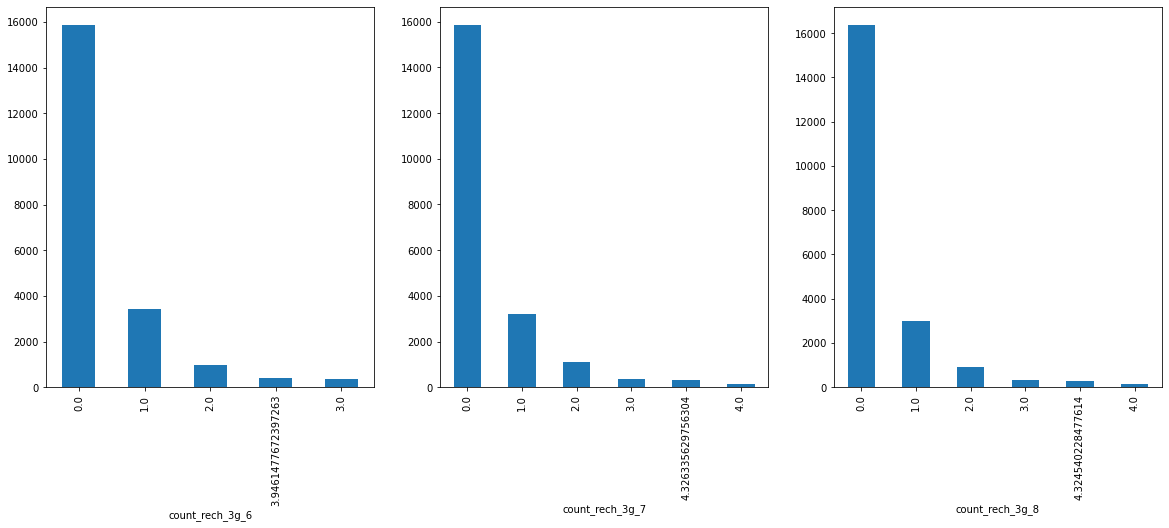

In [254]:
#count_rech_3g across months 6,7 and 8
fig, axs = plt.subplots(1,3,figsize=(20,7))
Telecom_df_filtered.count_rech_3g_6.sort_values().value_counts().plot.bar(ax = axs[0])
Telecom_df_filtered.count_rech_3g_7.sort_values().value_counts().plot.bar(ax = axs[1])
Telecom_df_filtered.count_rech_3g_8.sort_values().value_counts().plot.bar(ax = axs[2])
axs[0].set_xlabel('count_rech_3g_6')
axs[1].set_xlabel('count_rech_3g_7')
axs[2].set_xlabel('count_rech_3g_8')
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['count_rech_3g_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['count_rech_3g_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['count_rech_3g_8'].sum()))

- Number of people using 2g seems to be more than 3g as per the above graphs
- Number of people using 2g or 3g across 3 months are almost similar

Total Sum for 6 = 1578321.4187541013
Total Sum for 7 = 1614629.4488383809
Total Sum for 8 = 1462511.1846599341


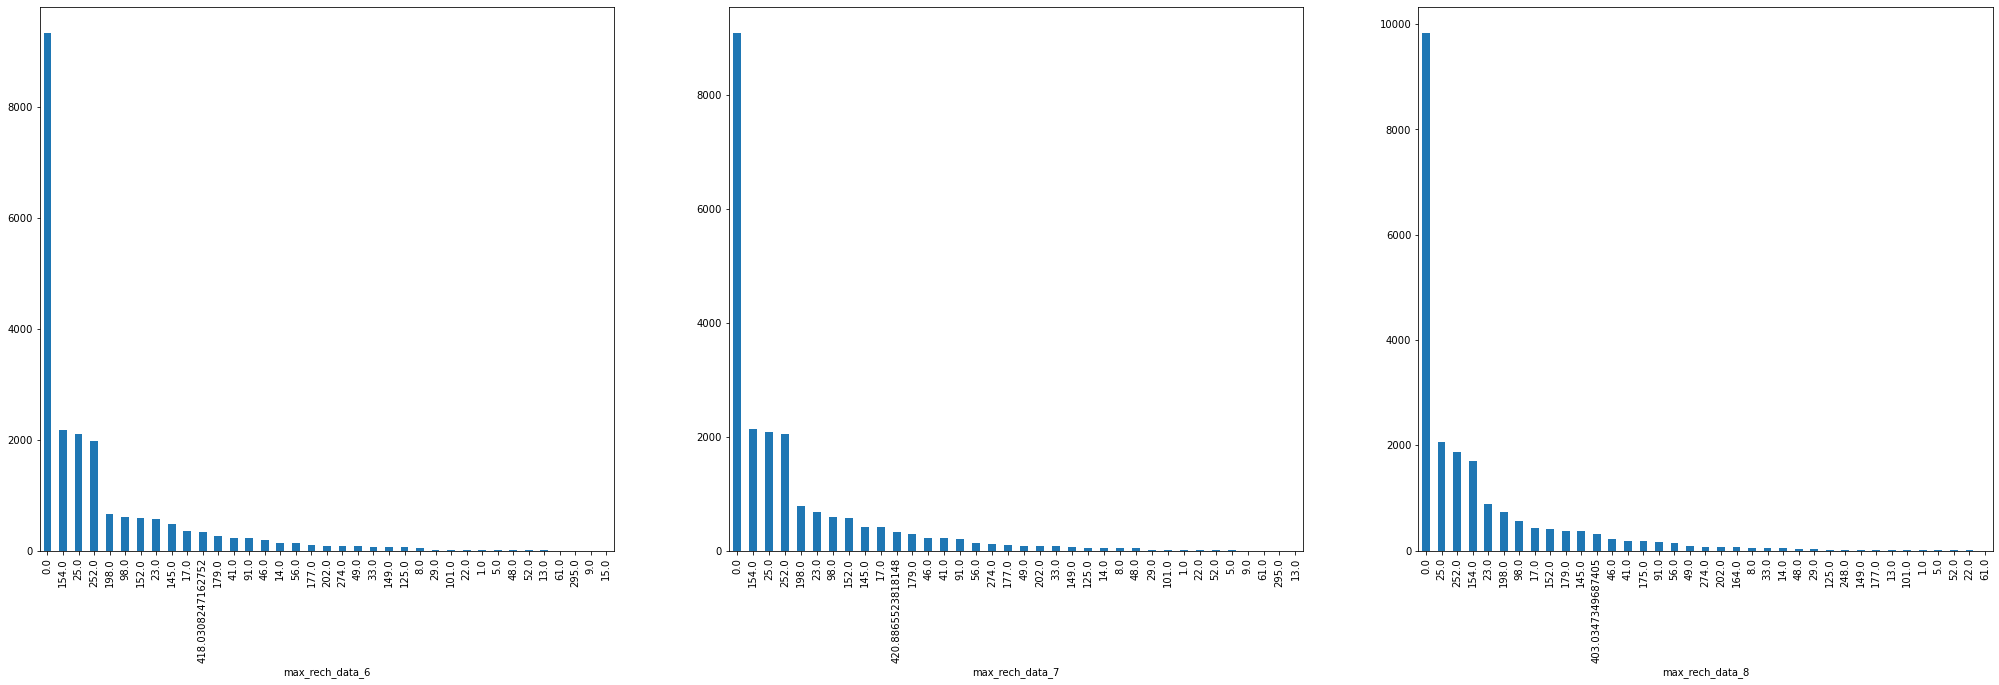

In [255]:
#max_rech_data across months 6,7 and 8
fig, axs = plt.subplots(1,3,figsize=(35,10))
Telecom_df_filtered.max_rech_data_6.sort_values().value_counts().plot.bar(ax = axs[0])
Telecom_df_filtered.max_rech_data_7.sort_values().value_counts().plot.bar(ax = axs[1])
Telecom_df_filtered.max_rech_data_8.sort_values().value_counts().plot.bar(ax = axs[2])
axs[0].set_xlabel('max_rech_data_6')
axs[1].set_xlabel('max_rech_data_7')
axs[2].set_xlabel('max_rech_data_8')
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['max_rech_data_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['max_rech_data_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['max_rech_data_8'].sum()))

- Number of users regarding for max amount 25,17,23 increased for month 7 and 8 compared to amount 154,198 ...
- Also we could see here as well an increase in month 7 and a reduction for month 8

Total Sum for 6 = 3417.4129394139613
Total Sum for 7 = 3616.371096340081
Total Sum for 8 = 3018.4617302714573


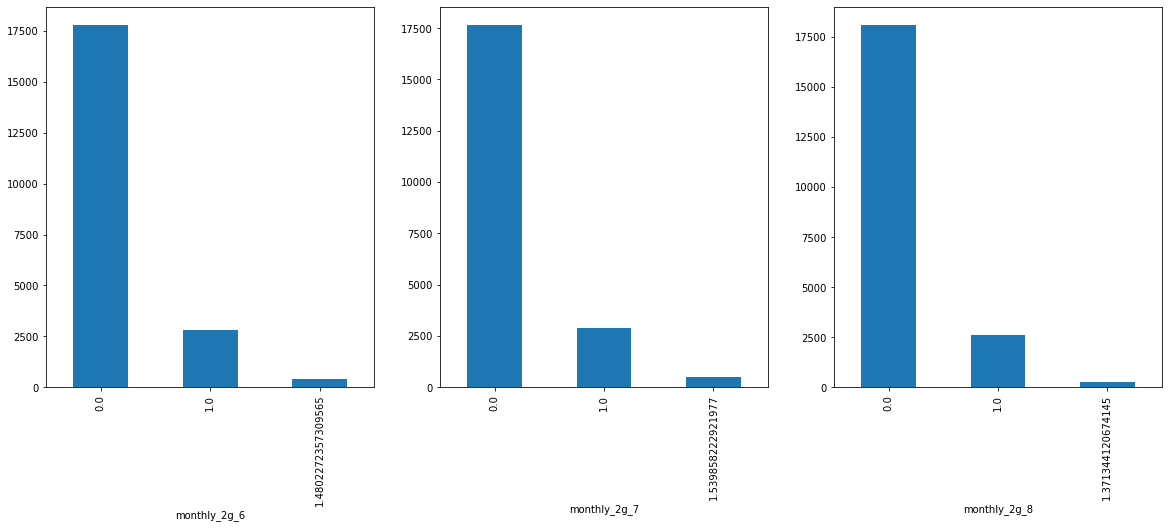

In [256]:
#monthly_2g across months 6,7 and 8
fig, axs = plt.subplots(1,3,figsize=(20,7))
Telecom_df_filtered.monthly_2g_6.sort_values().value_counts().plot.bar(ax = axs[0])
Telecom_df_filtered.monthly_2g_7.sort_values().value_counts().plot.bar(ax = axs[1])
Telecom_df_filtered.monthly_2g_8.sort_values().value_counts().plot.bar(ax = axs[2])
axs[0].set_xlabel('monthly_2g_6')
axs[1].set_xlabel('monthly_2g_7')
axs[2].set_xlabel('monthly_2g_8')
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['monthly_2g_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['monthly_2g_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['monthly_2g_8'].sum()))

Total Sum for 6 = 4125.783688119663
Total Sum for 7 = 4291.658901966079
Total Sum for 8 = 3942.700990602657


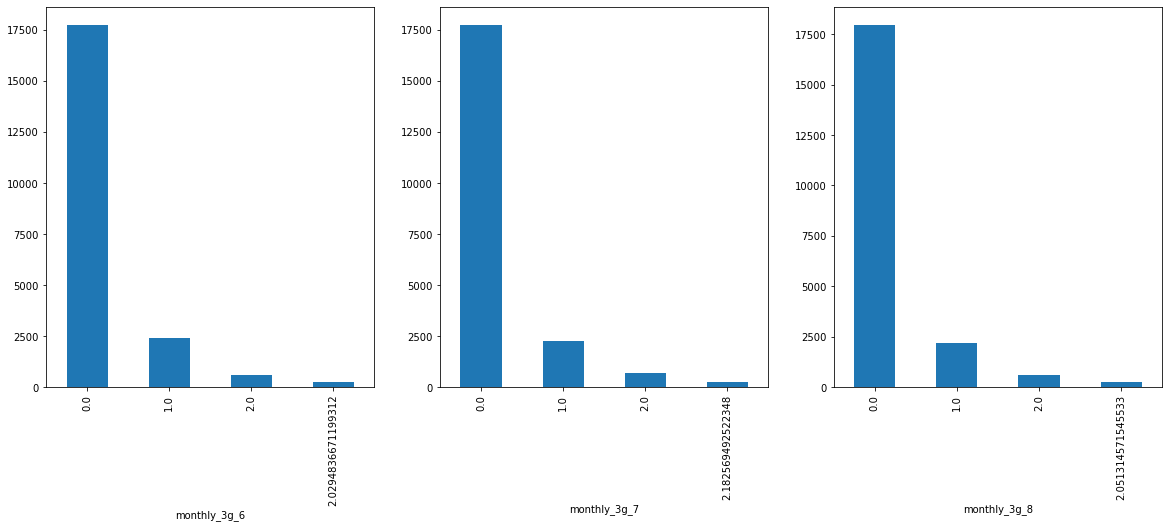

In [257]:
#monthly_3g across months 6,7 and 8
fig, axs = plt.subplots(1,3,figsize=(20,7))
Telecom_df_filtered.monthly_3g_6.sort_values().value_counts().plot.bar(ax = axs[0])
Telecom_df_filtered.monthly_3g_7.sort_values().value_counts().plot.bar(ax = axs[1])
Telecom_df_filtered.monthly_3g_8.sort_values().value_counts().plot.bar(ax = axs[2])
axs[0].set_xlabel('monthly_3g_6')
axs[1].set_xlabel('monthly_3g_7')
axs[2].set_xlabel('monthly_3g_8')
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['monthly_3g_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['monthly_3g_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['monthly_3g_8'].sum()))

- Customers tend to use more monthly scheme in 3g than 2g

#### Amount related columns analysis

Total Sum for 6 = 11522858.103276407
Total Sum for 7 = 11535114.809176315
Total Sum for 8 = 10437329.059629325


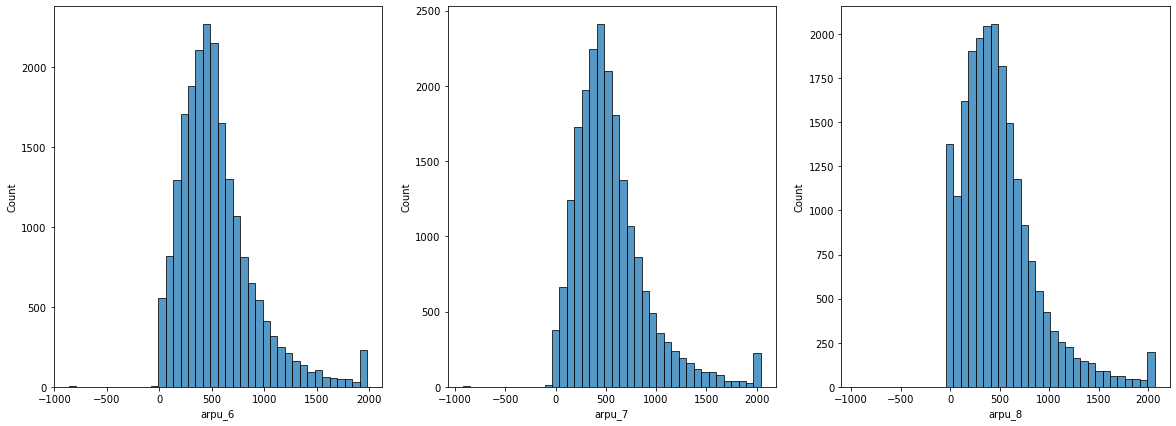

In [258]:
# average revenue per user across months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered['arpu_6'],bins=40, ax=axs[0])
sns.histplot(Telecom_df_filtered['arpu_7'],bins=40, ax=axs[1])
sns.histplot(Telecom_df_filtered['arpu_8'],bins=40, ax=axs[2])
fig.show()


print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['arpu_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['arpu_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['arpu_8'].sum()))

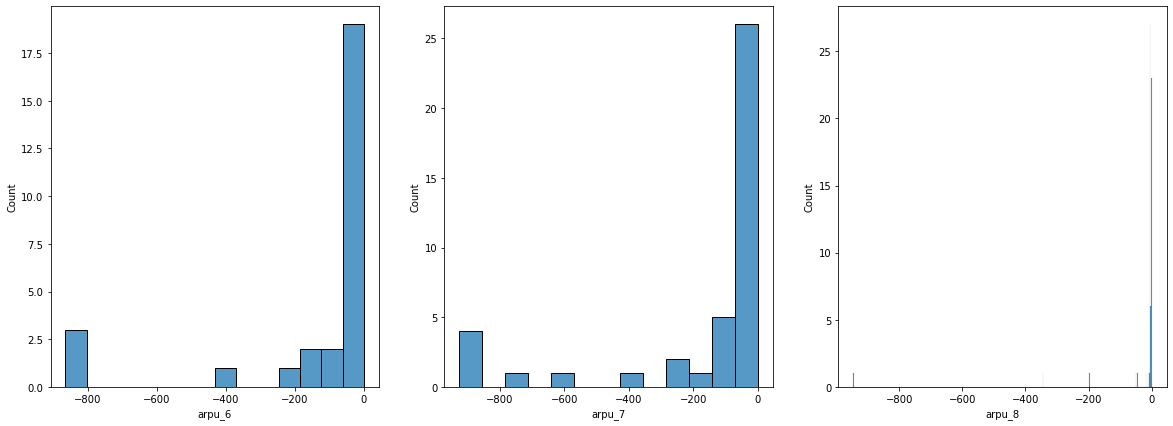

In [259]:
# -ve average revenue per user across months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['arpu_6']<0.0]['arpu_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['arpu_7']<0.0]['arpu_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['arpu_8']<0.0]['arpu_8'],ax=axs[2])
fig.show()


- The -ve average revenue per user keeps on decreasing over the months
- Also the total average revenue per user reduced for month 8 compared to 6 and 7

Total Sum for 6 = 1206372.8778748852
Total Sum for 7 = 1216452.3506004475
Total Sum for 8 = 1091165.830722198


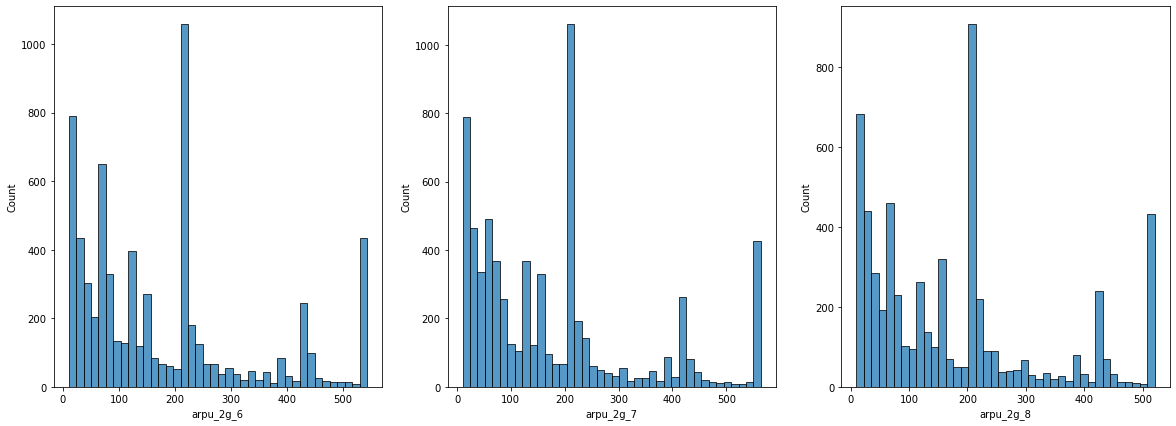

In [260]:
# average revenue 2g per user across months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['arpu_2g_6']>10.0]['arpu_2g_6'],bins=40, ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['arpu_2g_7']>10.0]['arpu_2g_7'],bins=40, ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['arpu_2g_8']>10.0]['arpu_2g_8'],bins=40, ax=axs[2])
fig.show()


print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['arpu_2g_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['arpu_2g_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['arpu_2g_8'].sum()))

Total Sum for 6 = 1258338.1564157456
Total Sum for 7 = 1277329.0799780078
Total Sum for 8 = 1163555.0643986163


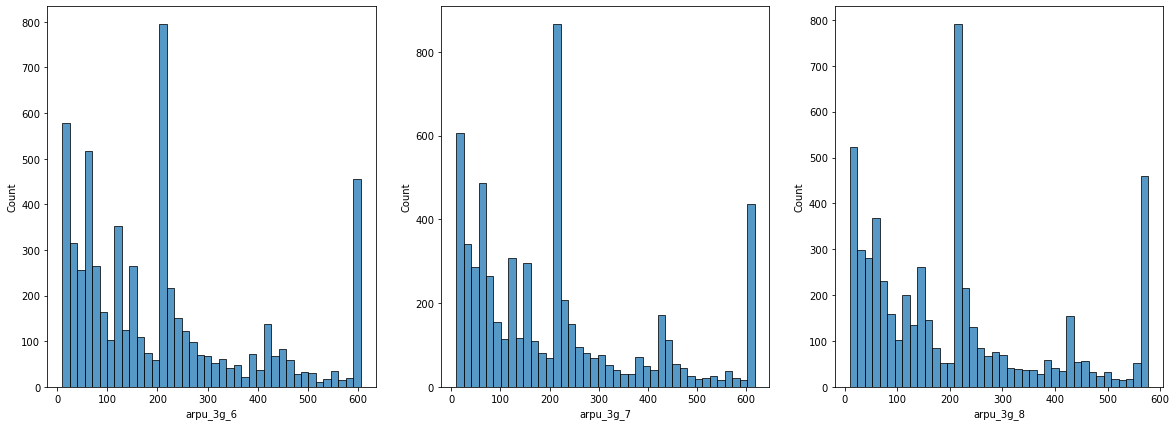

In [261]:
# average revenue 3g per user across months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['arpu_3g_6']>10.0]['arpu_3g_6'],bins=40, ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['arpu_3g_7']>10.0]['arpu_3g_7'],bins=40, ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['arpu_3g_8']>10.0]['arpu_3g_8'],bins=40, ax=axs[2])
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['arpu_3g_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['arpu_3g_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['arpu_3g_8'].sum()))

- Average revenue for 2g and 3g show an increase in month 7 and a dip in month 8
- Average revenue from 3g is more than 2g

Total Sum for 6 = 13640891.067606583
Total Sum for 7 = 13558846.955708593
Total Sum for 8 = 11990804.743630884


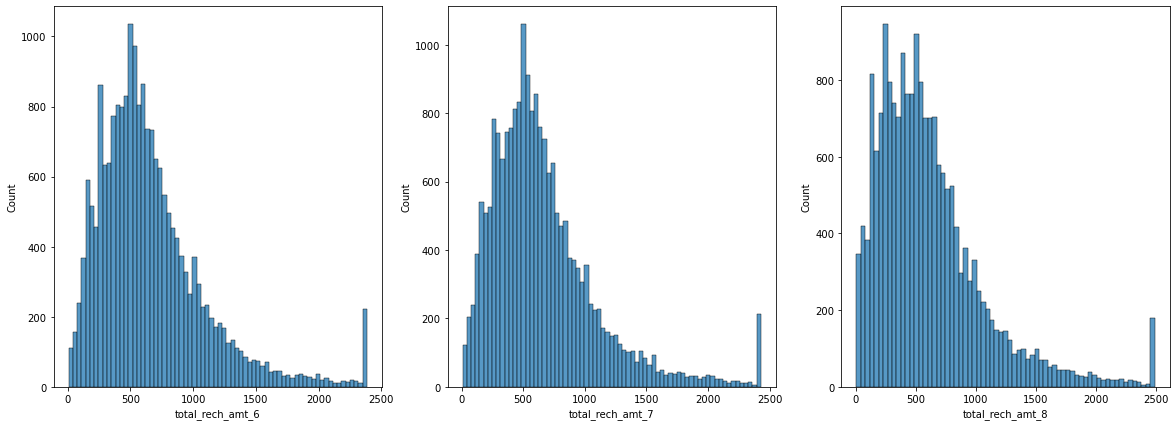

In [262]:
# total recharge amount across 3 months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['total_rech_amt_6']>0.0]['total_rech_amt_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['total_rech_amt_7']>0.0]['total_rech_amt_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered[Telecom_df_filtered['total_rech_amt_8']>0.0]['total_rech_amt_8'],ax=axs[2])
fig.show()

print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['total_rech_amt_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['total_rech_amt_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['total_rech_amt_8'].sum()))

- Total recharge amount has reduced significantly for month 8 compared to month 6 and 7

Max recharge amount for 6 700.5894666481225
Max recharge amount for 7 691.3831496443323
Max recharge amount for 8 662.3175513565421
Percentage of customers with max recharge amount for 6 0.01855993908532813
Percentage of customers with max recharge amount for 7 0.02046352258125922
Percentage of customers with max recharge amount for 8 0.015228667967448721
   index  max_rech_amt_6
0  110.0        0.221672
1  154.0        0.078428
2  252.0        0.073431
   index  max_rech_amt_7
0  110.0        0.157474
1  154.0        0.077999
2  252.0        0.075477
   index  max_rech_amt_8
0  130.0        0.171132
1    0.0        0.074097
2  252.0        0.068672


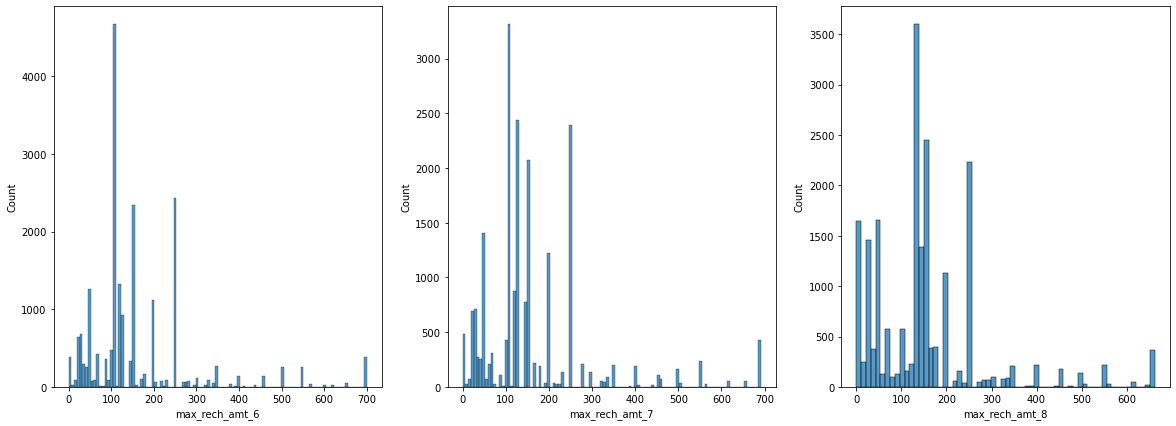

In [263]:
# max recharge amount across 3 months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered['max_rech_amt_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered['max_rech_amt_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered['max_rech_amt_8'],ax=axs[2])
fig.show()

print('Max recharge amount for 6 {0}'.format(Telecom_df_filtered['max_rech_amt_6'].max()))
print('Max recharge amount for 7 {0}'.format(Telecom_df_filtered['max_rech_amt_7'].max()))
print('Max recharge amount for 8 {0}'.format(Telecom_df_filtered['max_rech_amt_8'].max()))


print('Percentage of customers with max recharge amount for 6 {0}'.format(Telecom_df_filtered['max_rech_amt_6'].value_counts(normalize=True)[Telecom_df_filtered['max_rech_amt_6'].max()]))
print('Percentage of customers with max recharge amount for 7 {0}'.format(Telecom_df_filtered['max_rech_amt_7'].value_counts(normalize=True)[Telecom_df_filtered['max_rech_amt_7'].max()]))
print('Percentage of customers with max recharge amount for 8 {0}'.format(Telecom_df_filtered['max_rech_amt_8'].value_counts(normalize=True)[Telecom_df_filtered['max_rech_amt_8'].max()]))

# Top 3 max recharge amount

print(Telecom_df_filtered['max_rech_amt_6'].value_counts(normalize=True).to_frame().reset_index()[0:3])
print(Telecom_df_filtered['max_rech_amt_7'].value_counts(normalize=True).to_frame().reset_index()[0:3])
print(Telecom_df_filtered['max_rech_amt_8'].value_counts(normalize=True).to_frame().reset_index()[0:3])

- The no of customers recharging for the max amount 2100, 2199 are very less
- 15 to 22% customer recharge for max amount  110-130

Max last day recharge amount for 6 535.9875843962609
Max last day recharge amount for 7 518.9518171876293
Max last day recharge amount for 8 508.5432411977833
   index  last_day_rch_amt_6
0  110.0            0.201923
1    0.0            0.143911
2   30.0            0.090706
   index  last_day_rch_amt_7
0    0.0            0.179936
1  110.0            0.089706
2   30.0            0.080902
   index  last_day_rch_amt_8
0    0.0            0.258031
1  130.0            0.161234
2   30.0            0.076048


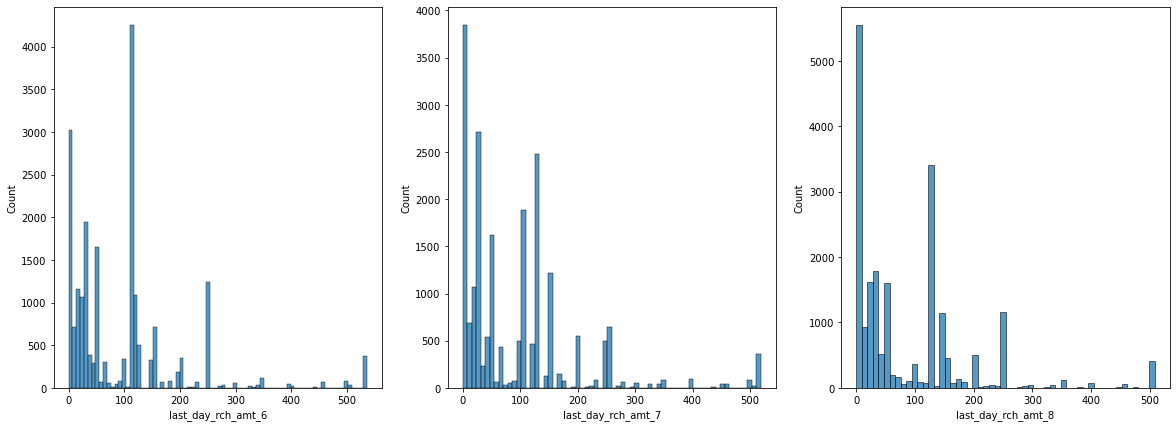

In [264]:
# last_day_rch_amt amount across months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered['last_day_rch_amt_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered['last_day_rch_amt_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered['last_day_rch_amt_8'],ax=axs[2])
fig.show()

print('Max last day recharge amount for 6 {0}'.format(Telecom_df_filtered['last_day_rch_amt_6'].max()))
print('Max last day recharge amount for 7 {0}'.format(Telecom_df_filtered['last_day_rch_amt_7'].max()))
print('Max last day recharge amount for 8 {0}'.format(Telecom_df_filtered['last_day_rch_amt_8'].max()))

# Top 3 last recharge amount

print(Telecom_df_filtered['last_day_rch_amt_6'].value_counts(normalize=True).to_frame().reset_index()[0:3])
print(Telecom_df_filtered['last_day_rch_amt_7'].value_counts(normalize=True).to_frame().reset_index()[0:3])
print(Telecom_df_filtered['last_day_rch_amt_8'].value_counts(normalize=True).to_frame().reset_index()[0:3])

- Last day recharge amount zero is increasing across month with 6% increase from 6 to 7
- On month 7 the last day recharge amount less compared to other months, which tells that on month 7 the last day recharge was less

#### Other columns

In [265]:
# funtion for grouped bar plot

def groupedBarPlot(varName):
    col1 = varName+'_6'
    col2 = varName+'_7'
    col3 = varName+'_8'
    
    df_6 = Telecom_df_filtered[col1].values.tolist()
    df_7 = Telecom_df_filtered[col2].values.tolist()
    df_8 = Telecom_df_filtered[col3].values.tolist()

    #First plot
    tr0 = go.Bar(
        x=Telecom_df_filtered[col1].value_counts().index.values,
        y=Telecom_df_filtered[col1].value_counts().values,
        name=col1
    )
    #Second plot
    tr1 = go.Bar(
        x=Telecom_df_filtered[col2].value_counts().index.values,
        y=Telecom_df_filtered[col2].value_counts().values,
        name=col2
    )
    #Third plot
    tr2 = go.Bar(
        x=Telecom_df_filtered[col3].value_counts().index.values,
        y=Telecom_df_filtered[col3].value_counts().values,
        name=col3
    )

    data = [tr0, tr1, tr2]

    layout = go.Layout(
        yaxis=dict(
            title='Count'
        ),
        xaxis=dict(
            title = varName + ' Variable'
        ),
        title = varName + ' variable distribution'
    )

    fig = go.Figure(data=data,layout = layout)

    py.iplot(fig, filename='grouped-bar')

In [266]:
groupedBarPlot('fb_user')

- Across months fb users are increasing by 100-300 users from month 6 to 7 and a dip in month 8

In [267]:
groupedBarPlot('night_pck_user')

- Number of users using night pack is very less
- On month 8 the users using night pack has decreased

Total Sum for 6 = 244303.84425467177
Total Sum for 7 = 241031.78806713803
Total Sum for 8 = 204540.12902563054


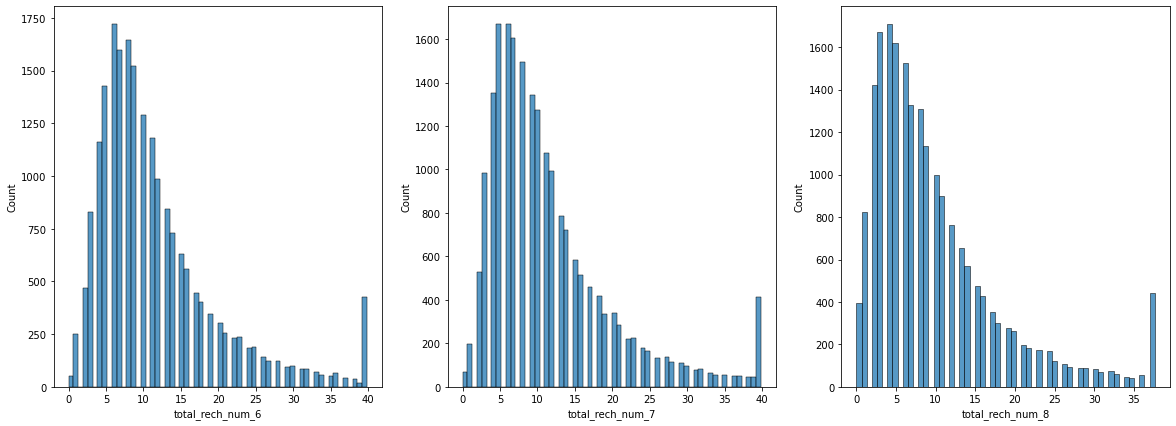

In [268]:
# total recharge number across 3 months

fig, axs = plt.subplots(1,3,figsize=(20,7))
sns.histplot(Telecom_df_filtered['total_rech_num_6'],ax=axs[0])
sns.histplot(Telecom_df_filtered['total_rech_num_7'],ax=axs[1])
sns.histplot(Telecom_df_filtered['total_rech_num_8'],ax=axs[2])
fig.show()


print('Total Sum for 6 = {0}'.format(Telecom_df_filtered['total_rech_num_6'].sum()))
print('Total Sum for 7 = {0}'.format(Telecom_df_filtered['total_rech_num_7'].sum()))
print('Total Sum for 8 = {0}'.format(Telecom_df_filtered['total_rech_num_8'].sum()))

- Total recharge number has been reduced for month 8

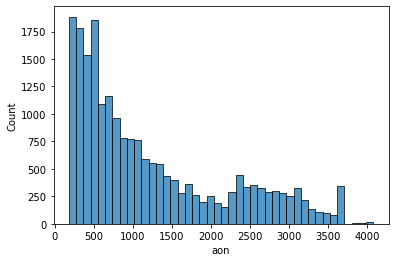

In [269]:
# aon

sns.histplot(Telecom_df_filtered['aon'])
fig.show()


- More customer are new to the network with less than 1000 aon

### B. Deriving new features

#### From the above observations,for all features we see a dip in usage for month 8 compared to month 6 and 7, we can assume that customers who would churn might stop the usage on month 8. This means that a difference in the usage between month 8 and 6,7 for some key variables could give more insight

In [270]:
def derive_diff_cols(colname):
    newcol = colname+'_diff'
    col8 = colname+'_8'
    col6 = colname+'_6'
    col7 = colname+'_7'
    Telecom_df_filtered[newcol] =  Telecom_df_filtered[col8] - (( Telecom_df_filtered[col6] + Telecom_df_filtered[col7])/2)



colForDiff = ['arpu','onnet_mou','offnet_mou','roam_ic_mou', 'roam_og_mou', 'loc_og_mou','std_og_mou', 
 'isd_og_mou', 'spl_og_mou', 'total_og_mou', 'loc_ic_mou', 'std_ic_mou', 'isd_ic_mou', 
 'spl_ic_mou', 'total_ic_mou', 'total_rech_num', 'total_rech_amt', 'max_rech_amt' ,
 'max_rech_data', 'vol_2g_mb', 'vol_3g_mb' ]


for i in colForDiff:
    derive_diff_cols(i)

In [271]:
# Since the difference gives insight on the 8th month details we can drop the following columns

Telecom_df_filtered.drop(['arpu_8','onnet_mou_8','offnet_mou_8','roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_mou_8','std_og_mou_8', 
 'isd_og_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'isd_ic_mou_8', 
 'spl_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
'max_rech_data_8','vol_2g_mb_8', 'vol_3g_mb_8'],axis=1,inplace=True)

In [272]:
# checking shape to see the additional columns
Telecom_df_filtered.shape

(21013, 155)

### C. Multivariate Analysis

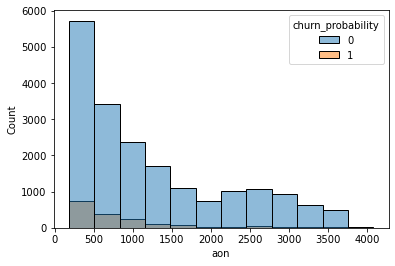

In [273]:
sns.histplot(data=Telecom_df_filtered,x='aon',hue='churn_probability',bins=12)
fig.show()

In [274]:
Telecom_df_filtered['tenure'] = (Telecom_df_filtered['aon']/30).round(0)

tn_range = [0, 6, 12, 24, 60, 61] 
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above'] 
Telecom_df_filtered['tenure_range'] = pd.cut(Telecom_df_filtered['tenure'], tn_range, labels=tn_label) 
Telecom_df_filtered['tenure_range'].head()

0    1-2 Yrs
1    1-2 Yrs
2    1-2 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

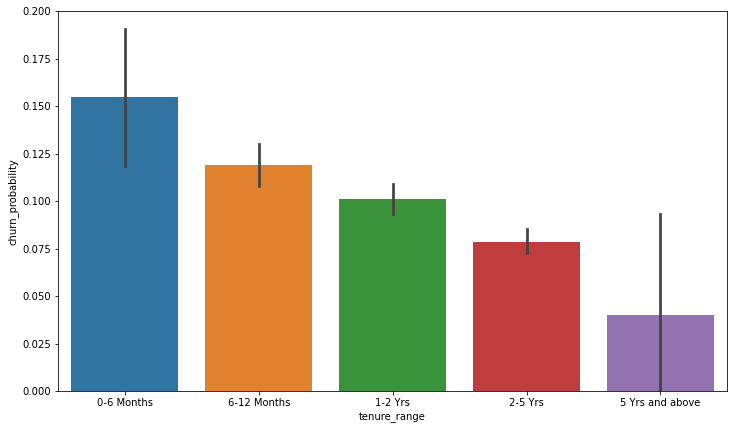

In [275]:
# Plotting a bar plot for tenure range 
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn_probability', data=Telecom_df_filtered)
plt.show()

- Customers who are new to the operator tend to churn more than those who stayed for longer period

In [276]:
# Dropping the tenure and tenure range added for analysis
Telecom_df_filtered.drop(['tenure','tenure_range'],axis=1,inplace=True)

In [277]:
# setting churn probability the dependent variable as categorical for analysis

Telecom_df_filtered['churn_probability'] = Telecom_df_filtered['churn_probability'].astype("category")

In [278]:
Telecom_df_filtered.shape

(21013, 155)

In [279]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
churn_corr = Telecom_df_filtered.corr()
churn_corr.loc[:,:] = np.tril(churn_corr, k=-1)
churn_corr = churn_corr.stack()
churn_corr
churn_corr[(churn_corr > 0.80) | (churn_corr < -0.80)].sort_values(ascending=False)

sachet_2g_7          count_rech_2g_7     0.981334
sachet_2g_8          count_rech_2g_8     0.981078
sachet_2g_6          count_rech_2g_6     0.978199
arpu_2g_7            arpu_3g_7           0.947105
arpu_2g_8            arpu_3g_8           0.946338
arpu_2g_6            arpu_3g_6           0.944122
total_rech_amt_6     arpu_6              0.934508
total_rech_amt_7     arpu_7              0.923887
total_ic_mou_6       loc_ic_mou_6        0.907708
total_ic_mou_7       loc_ic_mou_7        0.902616
total_og_mou_diff    std_og_mou_diff     0.894262
loc_ic_mou_6         loc_ic_t2m_mou_6    0.893234
loc_ic_mou_7         loc_ic_t2m_mou_7    0.883986
monthly_3g_6         arpu_2g_6           0.879867
monthly_3g_8         arpu_2g_8           0.877444
std_og_t2t_mou_7     onnet_mou_7         0.873972
std_ic_mou_7         std_ic_t2m_mou_7    0.873775
std_ic_mou_6         std_ic_t2m_mou_6    0.873012
monthly_3g_7         arpu_2g_7           0.872493
loc_og_mou_6         loc_og_t2m_mou_6    0.870850


In [280]:
# Based on the correlation we have decided to drop the following columns,
# since they have more than 80% correlation with other columns

Telecom_df_filtered.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_8','count_rech_3g_7','count_rech_3g_6' 
,'total_rech_amt_6','total_rech_amt_7','loc_ic_mou_7','loc_ic_mou_6','std_og_mou_diff','onnet_mou_7',
'std_ic_t2m_mou_7','loc_ic_mou_diff','onnet_mou_6','total_rech_amt_diff','offnet_mou_7',
'std_og_mou_7','std_ic_t2m_mou_6','std_og_mou_6','loc_ic_t2m_mou_6','offnet_mou_6','loc_ic_t2m_mou_7',
'loc_og_t2m_mou_6','loc_og_t2m_mou_7'],axis=1,inplace=True)

In [281]:
# Due to the high colinearity with 2g and 3g revenue we are deriving a new column for arpu 
# and will drop the 2g and 3g arpu

Telecom_df_filtered['arpu_data_6'] = Telecom_df_filtered['arpu_2g_6'] + Telecom_df_filtered['arpu_3g_6']
Telecom_df_filtered['arpu_data_7'] = Telecom_df_filtered['arpu_2g_7'] + Telecom_df_filtered['arpu_3g_7']
Telecom_df_filtered['arpu_data_8'] = Telecom_df_filtered['arpu_2g_8'] + Telecom_df_filtered['arpu_3g_8']
Telecom_df_filtered.drop(['arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8'],
                         axis=1,inplace=True)

In [282]:
# Since average revenue for data will indicate the total data recharge we can drop this

Telecom_df_filtered.drop(['total_data_rech_6','total_data_rech_7','total_data_rech_8'],axis=1,inplace=True)

In [283]:
Telecom_df_filtered.shape

(21013, 124)

### Box plot for each feature against churn probability

#### Outgoing minutes

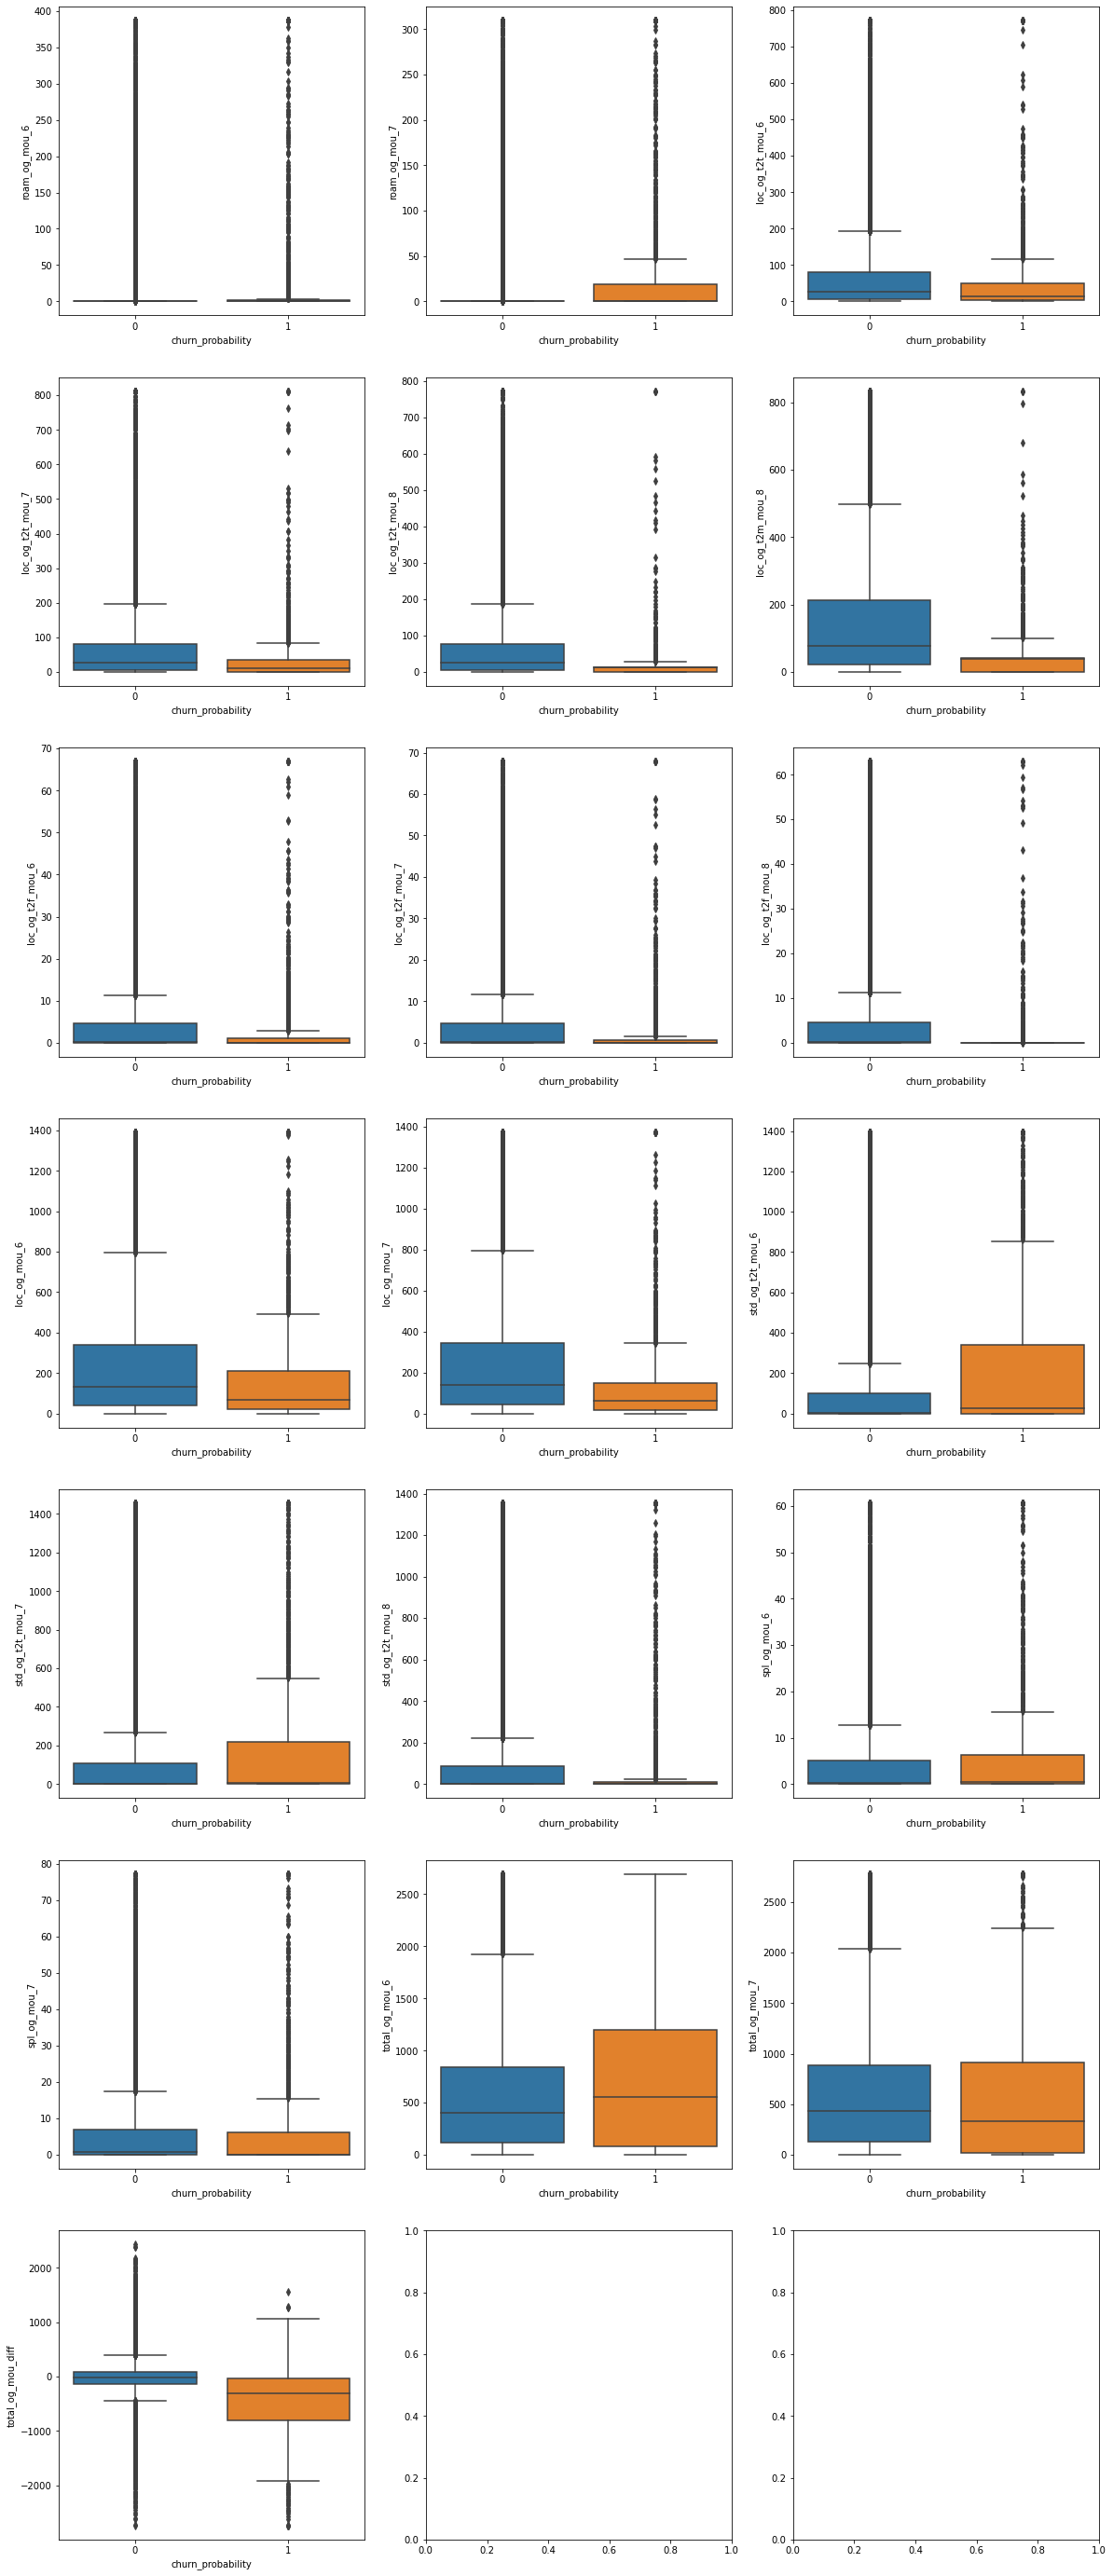

In [284]:
# For the following feature we can see some change when checked against churn probability

og_chart_cols = [ 'roam_og_mou_6','roam_og_mou_7',
                  'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8',
                  'loc_og_t2m_mou_8',
                  'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
                  'loc_og_mou_6','loc_og_mou_7',
                  'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8',
                  'spl_og_mou_6','spl_og_mou_7',
                  'total_og_mou_6','total_og_mou_7',
                  'total_og_mou_diff'
                ]

fig, axs = plt.subplots(7,3,figsize=(20,50))
j=0
for i in og_chart_cols:
    if(j>=3):
        k=j%3
    else:
        k=j
    sns.boxplot(Telecom_df_filtered['churn_probability'],Telecom_df_filtered[i],ax=axs[j//3][k])
    j+=1
fig.show()

- Roaming outgoing minutes of usage is increased by some value for 75th to 100th percentile of churned customers for July and August month.



- Following variables are decreasing across the months for churned customers
  - Local outgoing mobile to mobile in same operator minutes.
  - Local outgoing mobile to mobile in other operator minutes.
  - Local ougoing operator to fixed lines of T minutes.
  - Total Local outgoing minutes of usage.
  
  

- Following variables strongly indicate customer has stopeed using in August month reason has highest usage of minutes in June and July and significantly reduced in August month. 
    - STD outgoing mobile to mobile in same operator minutes.
    - Special Outgoing minutes of usage.
    - Total Outgoing minutes of usage.
    - STD outgoing minutes of usage difference between Aug month and  Average of June and July month.
    - Total Outgoing minutes of usage difference between Aug month and  Average of June and July month.


#### Incoming minutes

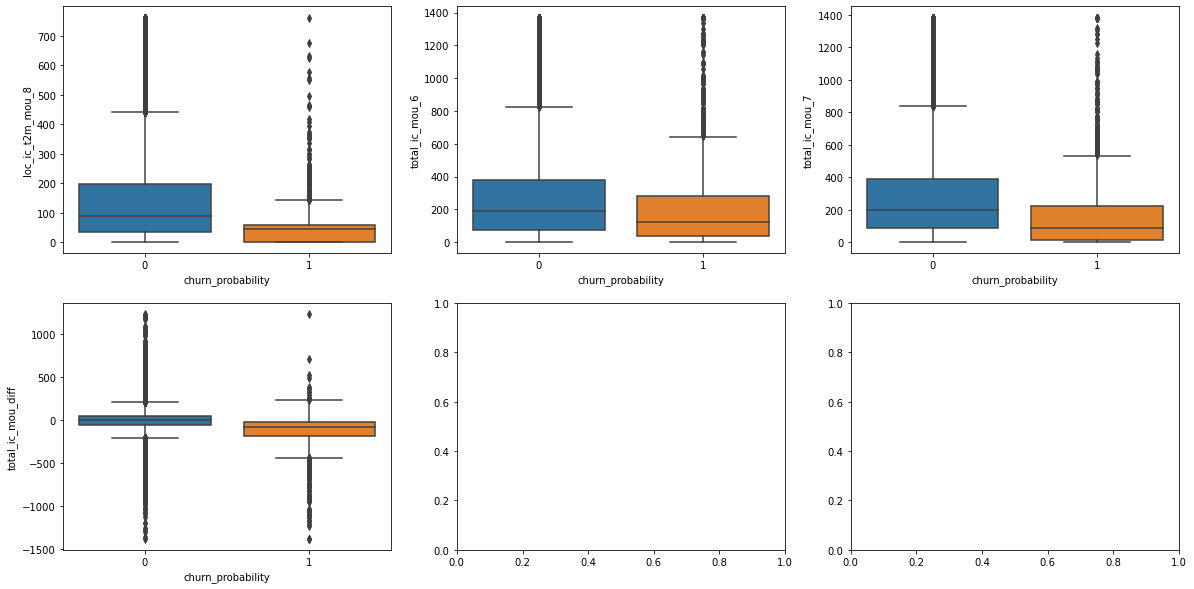

In [285]:
# For the following feature we can see some change when checked against churn probability

ic_chart_cols = [ 'loc_ic_t2m_mou_8',
                  
                  'total_ic_mou_6','total_ic_mou_7'
                  ,'total_ic_mou_diff'
                
                ]

fig, axs = plt.subplots(2,3,figsize=(20,10))
j=0
for i in ic_chart_cols:
    if(j>=3):
        k=j%3
    else:
        k=j
    sns.boxplot(Telecom_df_filtered['churn_probability'],Telecom_df_filtered[i],ax=axs[j//3][k])
    j+=1
fig.show()

- Following variables are decreasing across the months for churned customers
  - Local Incoming mobile to mobile in same operator minutes.
  - Local Incoming minutes of usage.
  - Total Local Incoming minutes of usage.
    
    
- Following variables strongly indicate customer has stopeed using in August month reason has highest usage of minutes in June and July and significantly reduced in August month.
   - Local Incoming minutes of usage difference between Aug month and Average of June and July month.
   - Total Incoming minutes of usage difference between Aug month and Average of June and July month.    

#### Data features

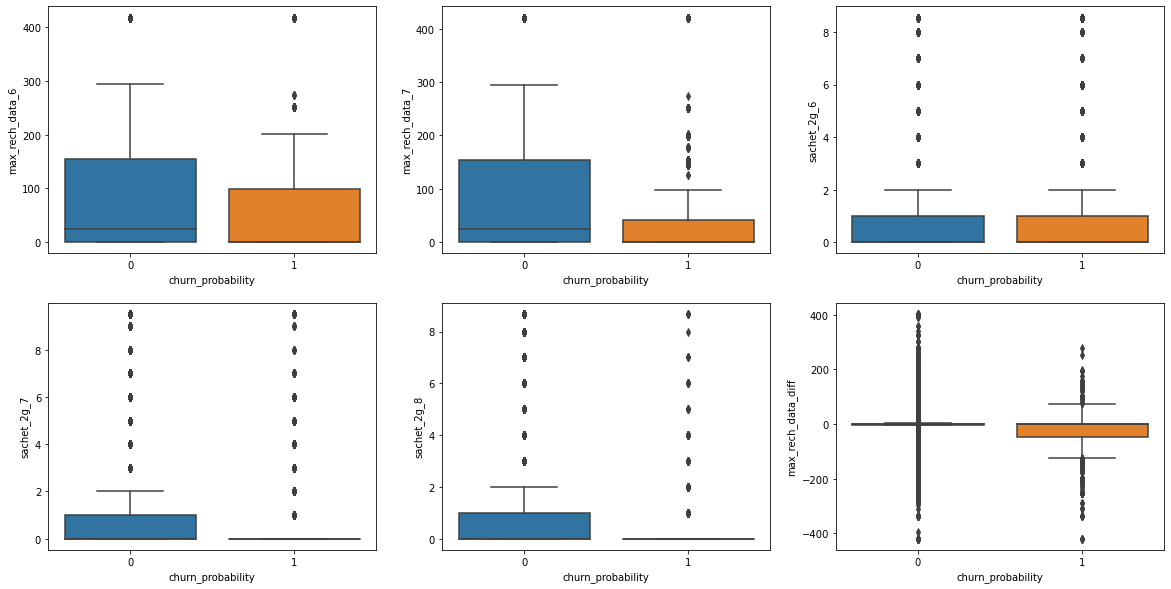

In [286]:
# For the following feature we can see some change when checked against churn probability

data_chart_cols = [ 'max_rech_data_6','max_rech_data_7',
                    'sachet_2g_6','sachet_2g_7','sachet_2g_8',
                    'max_rech_data_diff'
                
                ]

fig, axs = plt.subplots(2,3,figsize=(20,10))
j=0
for i in data_chart_cols:
    if(j>=3):
        k=j%3
    else:
        k=j
    sns.boxplot(Telecom_df_filtered['churn_probability'],Telecom_df_filtered[i],ax=axs[j//3][k])
    j+=1
fig.show()

- Following variables are decreasing across the months for churned customers
   - Total recharge data.
   - Maximum recharge data.
   - Count of recharge for 2g data
   - Average recharge amount data.
   - sachet data for 2g
   - Maximum recharge data difference between Aug month and Average of June and July month.
   - Average recharge data difference between Aug month and Average of June and July month.

#### Other features

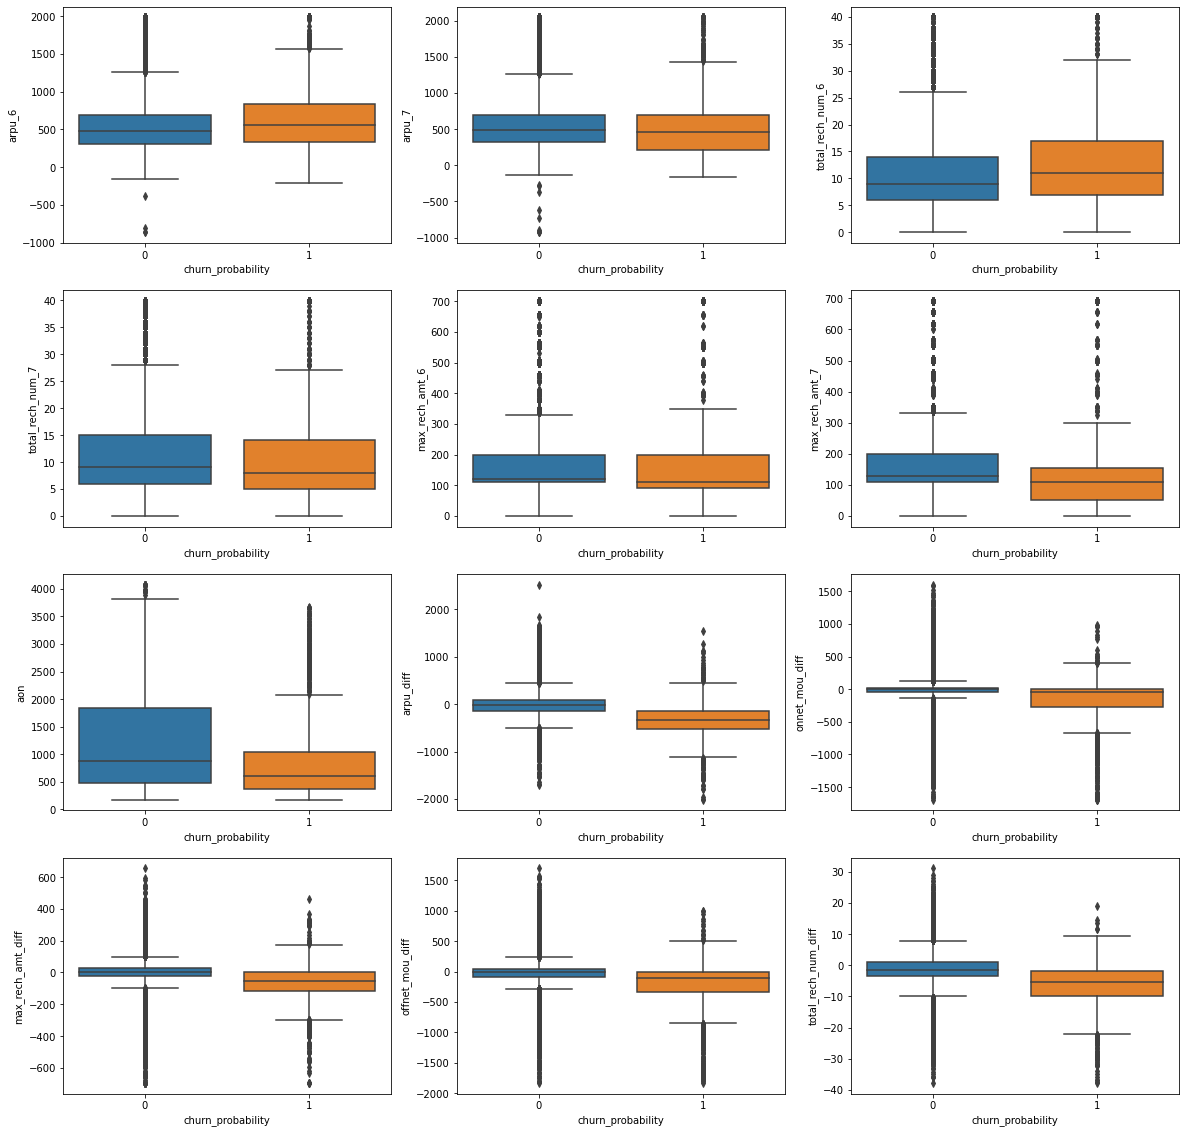

In [287]:
# For the following feature we can see some change when checked against churn probability

other_chart_cols = [ 'arpu_6','arpu_7',                  
                    'total_rech_num_6','total_rech_num_7',  
                    'max_rech_amt_6','max_rech_amt_7',
                    'aon','arpu_diff','onnet_mou_diff','max_rech_amt_diff',
                    'offnet_mou_diff','total_rech_num_diff'
                    ]

fig, axs = plt.subplots(4,3,figsize=(20,20))
j=0
for i in other_chart_cols:
    if(j>=3):
        k=j%3
    else:
        k=j
    sns.boxplot(Telecom_df_filtered['churn_probability'],Telecom_df_filtered[i],ax=axs[j//3][k])
    j+=1
fig.show()

- Following variables are decreasing across the months for churned customers
  - Average revenue per user.
  - On network minutes of usage.
  - off network minutes of usage.
  - Total recharge number.
  - Total recharge amount.
  - Maximum recharge amount.
  - Maximum recharege amount difference between Aug month and Average of June and July month.
  - onnet minutes of usage difference between Aug month and Average of June and July month.
  - offnet minutes of usage difference between Aug month and Average of June and July month.
  - total recharege number difference between Aug month and Average of June and July month.
  - totatl recharge amount difference between Aug month and Average of June and July month.
  

- Customer who has less tenure with operator are chruning more.
  
  

### Correlation of each feature against churn probability

Text(0.5, 1.0, 'Features Correlating with Churn variable')

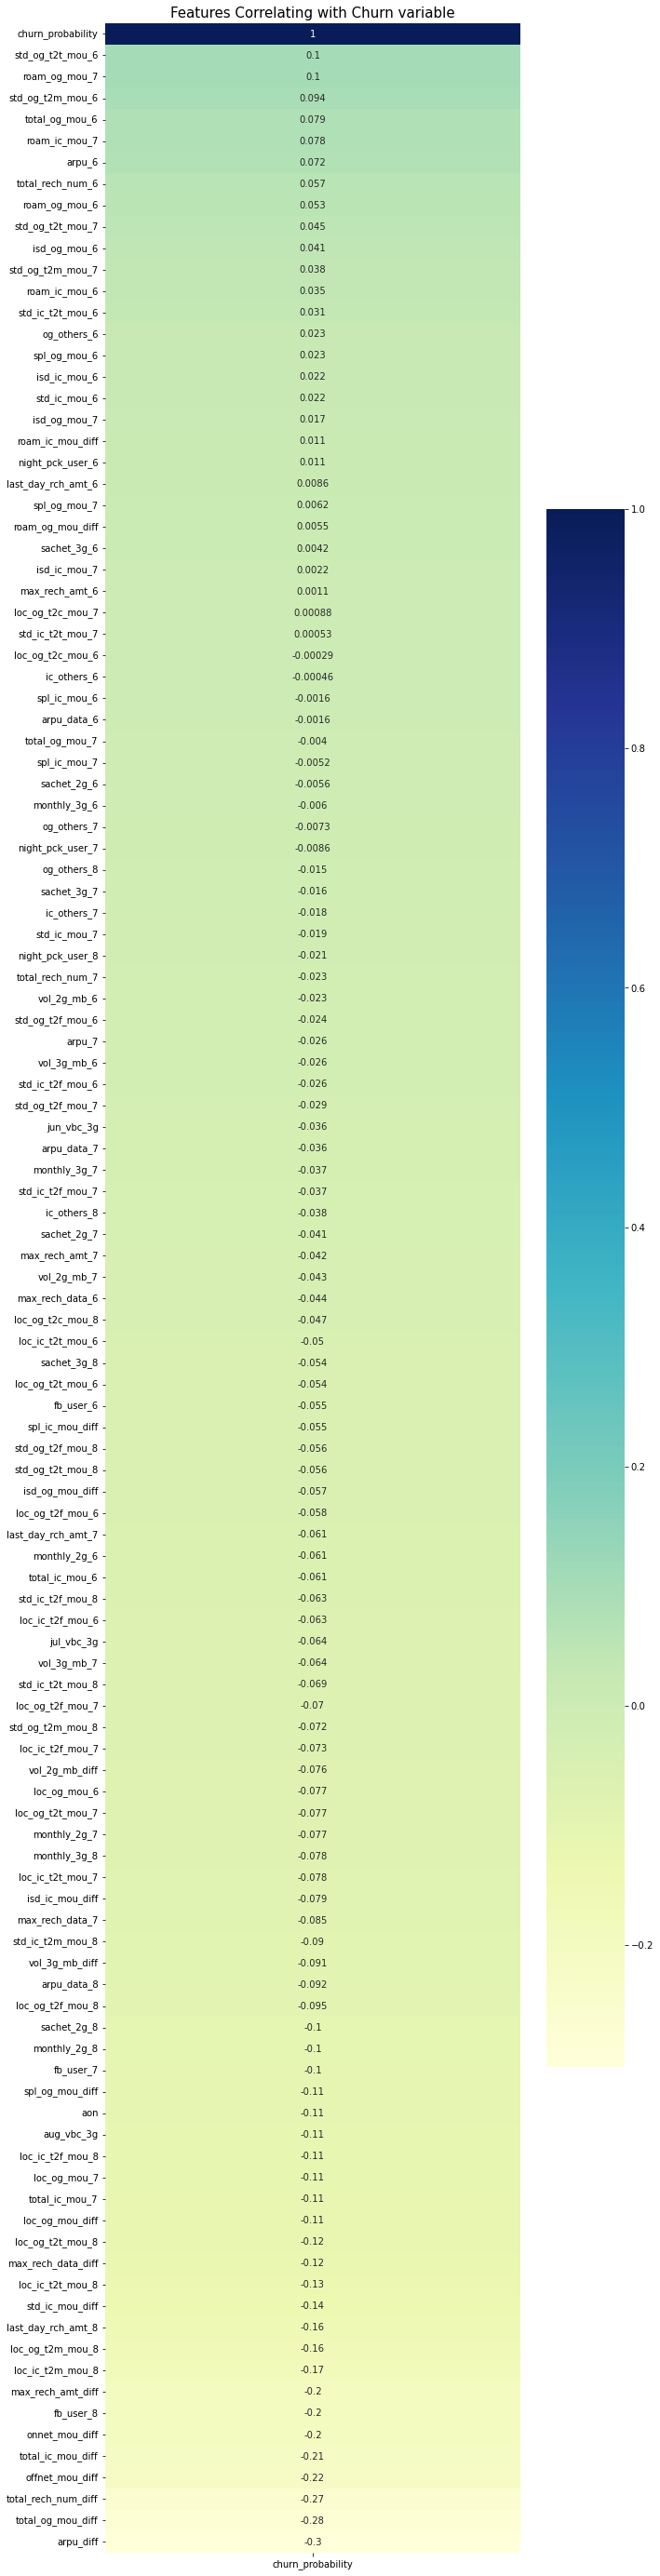

In [288]:
Telecom_df_filtered['churn_probability'] = Telecom_df_filtered['churn_probability'].astype("int")
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(Telecom_df_filtered.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True, cmap='YlGnBu')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

In [289]:
Telecom_df_filtered.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 124 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    arpu_6                    21013 non-null  float64
 1    arpu_7                    21013 non-null  float64
 2    roam_ic_mou_6             21013 non-null  float64
 3    roam_ic_mou_7             21013 non-null  float64
 4    roam_og_mou_6             21013 non-null  float64
 5    roam_og_mou_7             21013 non-null  float64
 6    loc_og_t2t_mou_6          21013 non-null  float64
 7    loc_og_t2t_mou_7          21013 non-null  float64
 8    loc_og_t2t_mou_8          21013 non-null  float64
 9    loc_og_t2m_mou_8          21013 non-null  float64
 10   loc_og_t2f_mou_6          21013 non-null  float64
 11   loc_og_t2f_mou_7          21013 non-null  float64
 12   loc_og_t2f_mou_8          21013 non-null  float64
 13   loc_og_t2c_mou_6          21013 non-null  fl

In [290]:
# All the columns added for analysis and date will be dropped.

unwantedCols = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']

Telecom_df_filtered.drop(unwantedCols,axis=1,inplace=True)

In [291]:
Telecom_df_filtered.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 118 columns):
 #    Column               Non-Null Count  Dtype  
---   ------               --------------  -----  
 0    arpu_6               21013 non-null  float64
 1    arpu_7               21013 non-null  float64
 2    roam_ic_mou_6        21013 non-null  float64
 3    roam_ic_mou_7        21013 non-null  float64
 4    roam_og_mou_6        21013 non-null  float64
 5    roam_og_mou_7        21013 non-null  float64
 6    loc_og_t2t_mou_6     21013 non-null  float64
 7    loc_og_t2t_mou_7     21013 non-null  float64
 8    loc_og_t2t_mou_8     21013 non-null  float64
 9    loc_og_t2m_mou_8     21013 non-null  float64
 10   loc_og_t2f_mou_6     21013 non-null  float64
 11   loc_og_t2f_mou_7     21013 non-null  float64
 12   loc_og_t2f_mou_8     21013 non-null  float64
 13   loc_og_t2c_mou_6     21013 non-null  float64
 14   loc_og_t2c_mou_7     21013 non-null  float64
 15   loc_og_t2c_mou_8 

## Splitting the Data into Training and Testing Sets<a class="anchor" id="Split"></a>

In [292]:
# Spliting to X and y
y= Telecom_df_filtered.pop('churn_probability')

X = Telecom_df_filtered

In [293]:
print(X.shape,y.shape)

(21013, 117) (21013,)


In [294]:
#Using train_test_split from sklearn we split the data into train and test set in 7:3 ratio

from sklearn.model_selection import train_test_split

# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,test_size=0.2,random_state=100)


In [295]:
print(X_train.shape,X_test.shape)

(14709, 117) (6304, 117)


In [296]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=27)

# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

### Scaling the feature

In [297]:
# scaling the features - necessary before using model creation

from sklearn.preprocessing import StandardScaler

cols = X_train.columns
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_train.columns = cols

cols = X_test.columns
X_test = pd.DataFrame(scaler.transform(X_test))
X_test.columns = cols

In [298]:
print(X_train.shape,X_test.shape)

(27020, 117) (6304, 117)


## Model Building and Evaluation

### Logistic Regression with PCA

In [345]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(random_state=42)

pca.fit(X_train)

PCA(random_state=42)

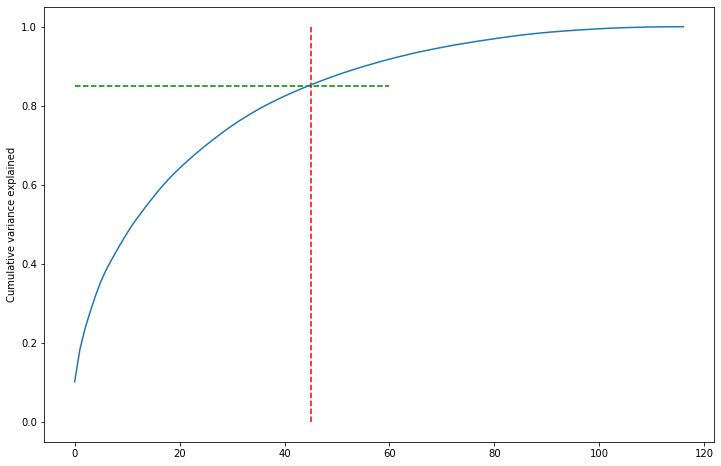

In [394]:
# Cumulative variance graph

var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=45, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.85, xmax=60, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

- We will choose 75 component which explains 95% variance 

In [395]:
from sklearn.decomposition import IncrementalPCA

#Incremental PCA for 75 components
pca_final = IncrementalPCA(n_components=45)

#Creating X_train and X_test

X_train_pca = pca_final.fit_transform(X_train)
print('Train data shape {0}'.format(X_train_pca.shape))
X_test_pca = pca_final.transform(X_test)
print('Test data shape {0}'.format(X_test_pca.shape))

Train data shape (27020, 45)
Test data shape (6304, 45)


In [396]:
from sklearn.linear_model import LogisticRegression

# Creating logistic regression model on the pca applied data set
learner_pca = LogisticRegression()

model_pca = learner_pca.fit(X_train_pca, y_train)

In [397]:
#Predicting the probability
y_train_pred_proba = model_pca.predict_proba(X_train_pca)

In [398]:
# Creating a dataframe which can hold the actual churn and the probability for churn
y_train_pred_final = pd.DataFrame({'Churned':y_train.values.reshape(-1), 'Churned_Prob':y_train_pred_proba[:,1].reshape(-1)})
y_train_pred_final

,Churned,Churned_Prob
0,0,0.959981
1,0,0.090304
2,0,0.051898
3,0,0.033359
4,0,0.019386
...,...,...
27015,1,0.515894
27016,1,0.905137
27017,1,0.974162
27018,1,0.625949


In [399]:
#Optimal cut-off point
def opt_cut_off(y_train_pred_final):
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_train_pred_final[i]= y_train_pred_final.Churned_Prob.map(lambda x: 1 if x > i else 0)
    return y_train_pred_final

In [400]:
opt_cut_off(y_train_pred_final).head()

,Churned,Churned_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.959981,1,1,1,1,1,1,1,1,1,1
1,0,0.090304,1,0,0,0,0,0,0,0,0,0
2,0,0.051898,1,0,0,0,0,0,0,0,0,0
3,0,0.033359,1,0,0,0,0,0,0,0,0,0
4,0,0.019386,1,0,0,0,0,0,0,0,0,0


In [401]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

def display_cut_off_score(y_train_pred_final):
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    return cutoff_df

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.707180  0.979497  0.434863
0.2   0.2  0.771207  0.957069  0.585344
0.3   0.3  0.806810  0.929608  0.684012
0.4   0.4  0.829756  0.900370  0.759141
0.5   0.5  0.840785  0.860474  0.821095
0.6   0.6  0.840007  0.807106  0.872909
0.7   0.7  0.823538  0.734863  0.912213
0.8   0.8  0.771170  0.599408  0.942931
0.9   0.9  0.652369  0.329238  0.975500


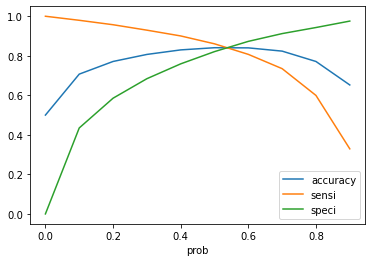

In [402]:
#Display cut off graph
display_cut_off_score(y_train_pred_final).plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [403]:
# Based on the plot 0.1 being the threshold set the predicted churn accordingly
y_train_pred_final['final_Predicted'] = y_train_pred_final.Churned_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churned,Churned_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.959981,1,1,1,1,1,1,1,1,1,1,1
1,0,0.090304,1,0,0,0,0,0,0,0,0,0,0
2,0,0.051898,1,0,0,0,0,0,0,0,0,0,0
3,0,0.033359,1,0,0,0,0,0,0,0,0,0,0
4,0,0.019386,1,0,0,0,0,0,0,0,0,0,0


In [404]:
#ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

#fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churned, y_train_pred_final.Churned_Prob, drop_intermediate = False )


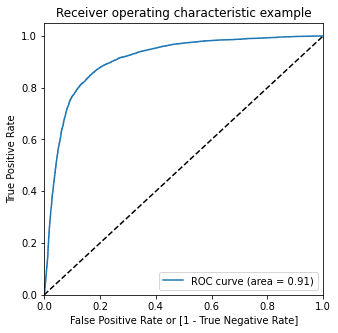

In [405]:
#ROC curve
draw_roc(y_train_pred_final.Churned, y_train_pred_final.Churned_Prob)

In [406]:
# Display score
def display_score(pred_final_df):
    confusion = metrics.confusion_matrix(pred_final_df['Churned'], pred_final_df['final_Predicted'] ) 
    print(confusion)

# Actual/Predicted       not_churn                         churn 
# not_churn                TN                               FP
# churn                    FN                               TP

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives


    # Accuracy
    print("Accuracy:-",(metrics.accuracy_score(pred_final_df['Churned'], 
                                               pred_final_df['final_Predicted'])).round(2))

    # Sensitivity
    print("Sensitivity:-",(TP / float(TP+FN)).round(2))

    # Specificity
    print("Specificity:-",(TN / float(TN+FP)).round(2))


In [407]:
display_score(y_train_pred_final)

[[11093  2417]
 [ 1885 11625]]
Accuracy:- 0.84
Sensitivity:- 0.86
Specificity:- 0.82


In [408]:
# Prediction of test data
y_test_pred_proba = model_pca.predict_proba(X_test_pca)

In [409]:
y_test_pred_final = pd.DataFrame({'Churned':y_test.values.reshape(-1), 'Churned_Prob':y_test_pred_proba[:,1].reshape(-1)})

In [434]:
# Determining the final probability based on the threshold 0.1
y_test_pred_final['final_Predicted'] = y_test_pred_final.Churned_Prob.map( lambda x: 1 if x > 0.9 else 0)

y_test_pred_final.head()

,Churned,Churned_Prob,final_Predicted
0,0,0.218905,0
1,0,0.192519,0
2,0,0.236220,0
3,0,0.010849,0
4,0,0.469686,0


In [435]:
display_score(y_test_pred_final)

[[5615  149]
 [ 350  190]]
Accuracy:- 0.92
Sensitivity:- 0.35
Specificity:- 0.97


### Decision Tree with PCA

In [135]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)



# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best sensitivity:- 0.8740192450037011
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [136]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [137]:
y_train_pred_proba = dt_pca_model.predict_proba(X_train_pca)

In [138]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values.reshape(-1), 'Churned_Prob':y_train_pred_proba[:,1].reshape(-1)})
y_train_pred_final

,Churned,Churned_Prob
0,0,0.925829
1,0,0.036585
2,0,0.013514
3,0,0.000000
4,0,0.003165
...,...,...
27015,1,0.714286
27016,1,0.937198
27017,1,0.882941
27018,1,0.943662


In [139]:
#Optimal cut-off point
opt_cut_off(y_train_pred_final).head()

,Churned,Churned_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.925829,1,1,1,1,1,1,1,1,1,1
1,0,0.036585,1,0,0,0,0,0,0,0,0,0
2,0,0.013514,1,0,0,0,0,0,0,0,0,0
3,0,0.000000,0,0,0,0,0,0,0,0,0,0
4,0,0.003165,1,0,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci
0.0   0.0  0.667765  1.000000  0.335529
0.1   0.1  0.801184  0.992154  0.610215
0.2   0.2  0.842968  0.973353  0.712583
0.3   0.3  0.864323  0.948779  0.779867
0.4   0.4  0.869652  0.935529  0.803775
0.5   0.5  0.874500  0.894226  0.854774
0.6   0.6  0.871725  0.862990  0.880459
0.7   0.7  0.863360  0.826869  0.899852
0.8   0.8  0.835233  0.743745  0.926721
0.9   0.9  0.739600  0.517691  0.961510


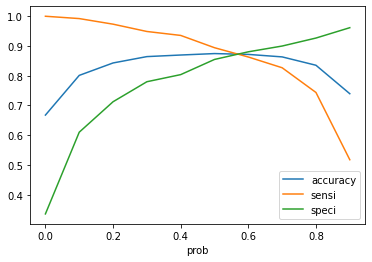

In [140]:
display_cut_off_score(y_train_pred_final).plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [141]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Churned_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()

,Churned,Churned_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.925829,1,1,1,1,1,1,1,1,1,1,1
1,0,0.036585,1,0,0,0,0,0,0,0,0,0,0
2,0,0.013514,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000000,0,0,0,0,0,0,0,0,0,0,0
4,0,0.003165,1,0,0,0,0,0,0,0,0,0,0


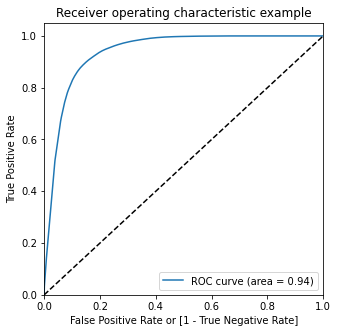

In [142]:
draw_roc(y_train_pred_final.Churned, y_train_pred_final.Churned_Prob)

In [143]:
display_score(y_train_pred_final)

[[ 8244  5266]
 [  106 13404]]
Accuracy:- 0.8
Sensitivity:- 0.99
Specificity:- 0.61


In [144]:
y_test_pred_proba = dt_pca_model.predict_proba(X_test_pca)

In [145]:
y_test_pred_final = pd.DataFrame({'Churned':y_test.values.reshape(-1), 'Churned_Prob':y_test_pred_proba[:,1].reshape(-1)})

In [146]:
y_test_pred_final['final_Predicted'] = y_test_pred_final.Churned_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_test_pred_final.head()

,Churned,Churned_Prob,final_Predicted
0,0,0.439394,1
1,0,0.019608,0
2,0,0.000000,0
3,0,0.020000,0
4,0,0.289855,1


In [147]:
display_score(y_test_pred_final)

[[3369 2395]
 [  72  468]]
Accuracy:- 0.61
Sensitivity:- 0.87
Specificity:- 0.58


###  Random Forest with PCA

In [148]:

# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier



param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)


# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
We can get accuracy of 0.8432643085448474 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [149]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=20,
                             n_estimators=300)


# Fit the model
rfc_model.fit(X_train_pca, y_train)


RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=300)

In [150]:
y_train_pred_proba = rfc_model.predict_proba(X_train_pca)

In [151]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values.reshape(-1), 'Churned_Prob':y_train_pred_proba[:,1].reshape(-1)})
y_train_pred_final

,Churned,Churned_Prob
0,0,0.741107
1,0,0.315293
2,0,0.317472
3,0,0.302354
4,0,0.122338
...,...,...
27015,1,0.433246
27016,1,0.685386
27017,1,0.774242
27018,1,0.556058


In [152]:
#Optimal cut-off point

opt_cut_off(y_train_pred_final).head()

,Churned,Churned_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.741107,1,1,1,1,1,1,1,1,0,0
1,0,0.315293,1,1,1,1,0,0,0,0,0,0
2,0,0.317472,1,1,1,1,0,0,0,0,0,0
3,0,0.302354,1,1,1,1,0,0,0,0,0,0
4,0,0.122338,1,1,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.520799  1.000000  0.041599
0.2   0.2  0.655070  0.992376  0.317765
0.3   0.3  0.762916  0.973649  0.552184
0.4   0.4  0.840415  0.923612  0.757217
0.5   0.5  0.841821  0.833605  0.850037
0.6   0.6  0.823242  0.747816  0.898668
0.7   0.7  0.765581  0.588749  0.942413
0.8   0.8  0.654774  0.329534  0.980015
0.9   0.9  0.500000  0.000000  1.000000


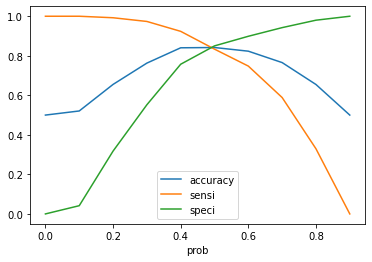

In [153]:
display_cut_off_score(y_train_pred_final).plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [154]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Churned_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()

,Churned,Churned_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.741107,1,1,1,1,1,1,1,1,0,0,1
1,0,0.315293,1,1,1,1,0,0,0,0,0,0,1
2,0,0.317472,1,1,1,1,0,0,0,0,0,0,1
3,0,0.302354,1,1,1,1,0,0,0,0,0,0,1
4,0,0.122338,1,1,0,0,0,0,0,0,0,0,1


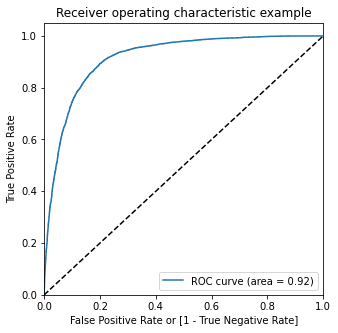

In [155]:
#ROC curve

draw_roc(y_train_pred_final.Churned, y_train_pred_final.Churned_Prob)

In [156]:
display_score(y_train_pred_final)

[[  562 12948]
 [    0 13510]]
Accuracy:- 0.52
Sensitivity:- 1.0
Specificity:- 0.04


In [157]:
y_test_pred_proba = rfc_model.predict_proba(X_test_pca)

In [158]:
y_test_pred_final = pd.DataFrame({'Churned':y_test.values.reshape(-1), 'Churned_Prob':y_test_pred_proba[:,1].reshape(-1)})

In [159]:
y_test_pred_final['final_Predicted'] = y_test_pred_final.Churned_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_test_pred_final.head()

,Churned,Churned_Prob,final_Predicted
0,0,0.259161,1
1,0,0.489251,1
2,0,0.321639,1
3,0,0.142866,1
4,0,0.613782,1


In [160]:
display_score(y_test_pred_final)

[[ 194 5570]
 [   0  540]]
Accuracy:- 0.12
Sensitivity:- 1.0
Specificity:- 0.03


#### Observations


### Feature selection using Logistic Regression and RFE

In [161]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [162]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=50)
rfe = rfe.fit(X_train, y_train)

In [163]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 16),
 ('arpu_7', True, 1),
 ('roam_ic_mou_6', False, 15),
 ('roam_ic_mou_7', True, 1),
 ('roam_og_mou_6', True, 1),
 ('roam_og_mou_7', False, 32),
 ('loc_og_t2t_mou_6', False, 12),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 43),
 ('loc_og_t2f_mou_7', False, 65),
 ('loc_og_t2f_mou_8', False, 49),
 ('loc_og_t2c_mou_6', False, 26),
 ('loc_og_t2c_mou_7', False, 57),
 ('loc_og_t2c_mou_8', False, 30),
 ('loc_og_mou_6', True, 1),
 ('loc_og_mou_7', True, 1),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', False, 8),
 ('std_og_t2t_mou_8', False, 40),
 ('std_og_t2m_mou_6', False, 25),
 ('std_og_t2m_mou_7', False, 23),
 ('std_og_t2m_mou_8', False, 24),
 ('std_og_t2f_mou_6', False, 59),
 ('std_og_t2f_mou_7', False, 33),
 ('std_og_t2f_mou_8', False, 2),
 ('isd_og_mou_6', False, 61),
 ('isd_og_mou_7', False, 39),
 ('spl_og_mou_6', False, 67),
 ('spl_og_mou_7', False, 66),
 ('og_others_6', False

In [164]:
col = X_train.columns[rfe.support_]

In [165]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'roam_ic_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'og_others_7',
       'og_others_8', 'total_og_mou_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'total_rech_num_7', 'max_rech_amt_6', 'max_rech_amt_7',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'max_rech_data_6',
       'vol_2g_mb_7', 'vol_3g_mb_7', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       's

In [166]:
logreg.fit(X_train[col],y_train)

LogisticRegression()

In [167]:
y_train_pred_proba = logreg.predict_proba(X_train[col])

In [168]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values.reshape(-1), 'Churned_Prob':y_train_pred_proba[:,1].reshape(-1)})
y_train_pred_final

,Churned,Churned_Prob
0,0,0.977587
1,0,0.129671
2,0,0.144136
3,0,0.018811
4,0,0.000947
...,...,...
27015,1,0.708094
27016,1,0.935824
27017,1,0.970747
27018,1,0.835676


In [169]:
#Optimal cut-off point

opt_cut_off(y_train_pred_final).head()

,Churned,Churned_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.977587,1,1,1,1,1,1,1,1,1,1
1,0,0.129671,1,1,0,0,0,0,0,0,0,0
2,0,0.144136,1,1,0,0,0,0,0,0,0,0
3,0,0.018811,1,0,0,0,0,0,0,0,0,0
4,0,0.000947,1,0,0,0,0,0,0,0,0,0


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.738083  0.982087  0.494078
0.2   0.2  0.804663  0.966025  0.643301
0.3   0.3  0.837417  0.942117  0.732717
0.4   0.4  0.855922  0.912657  0.799186
0.5   0.5  0.863434  0.873279  0.853590
0.6   0.6  0.855033  0.816432  0.893634
0.7   0.7  0.839415  0.752628  0.926203
0.8   0.8  0.804256  0.655366  0.953146
0.9   0.9  0.715618  0.452628  0.978608


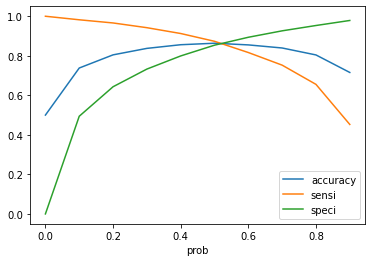

In [170]:
display_cut_off_score(y_train_pred_final).plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [171]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Churned_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()

,Churned,Churned_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.977587,1,1,1,1,1,1,1,1,1,1,1
1,0,0.129671,1,1,0,0,0,0,0,0,0,0,1
2,0,0.144136,1,1,0,0,0,0,0,0,0,0,1
3,0,0.018811,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000947,1,0,0,0,0,0,0,0,0,0,0


In [172]:
display_score(y_train_pred_final)

[[ 6675  6835]
 [  242 13268]]
Accuracy:- 0.74
Sensitivity:- 0.98
Specificity:- 0.49


In [173]:
y_test_pred_proba = logreg.predict_proba(X_test[col])

In [174]:
y_test_pred_final = pd.DataFrame({'Churned':y_test.values.reshape(-1), 'Churned_Prob':y_test_pred_proba[:,1].reshape(-1)})
y_test_pred_final

,Churned,Churned_Prob
0,0,0.261494
1,0,0.344473
2,0,0.225798
3,0,0.002548
4,0,0.390255
...,...,...
6299,0,0.034540
6300,0,0.093809
6301,0,0.055809
6302,0,0.009659


In [175]:
y_test_pred_final['final_Predicted'] = y_test_pred_final.Churned_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_test_pred_final.head()

,Churned,Churned_Prob,final_Predicted
0,0,0.261494,1
1,0,0.344473,1
2,0,0.225798,1
3,0,0.002548,0
4,0,0.390255,1


In [176]:
display_score(y_test_pred_final)

[[2832 2932]
 [  38  502]]
Accuracy:- 0.53
Sensitivity:- 0.93
Specificity:- 0.49


In [177]:
logreg.coef_[0]

array([ 0.21895834,  0.2188184 ,  0.23386276,  0.17247632, -0.53187932,
       -0.60221039,  0.39927542,  0.2029476 ,  0.17190501, -0.22305147,
        0.22066823,  1.06986392,  2.6499466 ,  0.28002077,  0.15635568,
       -0.56268379, -0.6134165 , -0.28035013,  1.32494413,  1.03973048,
       -3.08305044, -3.05882415, -0.39476261, -0.2564784 ,  0.35445528,
        0.42314079, -0.35558069, -0.48267264, -0.27911959, -0.30814646,
       -0.35313221, -0.1648698 ,  0.20312926, -0.41080592, -0.16532034,
       -0.33303382,  0.14952508,  0.17482335,  0.15157463,  0.53399749,
       -0.58170462,  1.76636245,  0.60858745, -0.62007274, -4.41643817,
       -0.54113452, -0.31209441, -0.27644856,  0.26024007,  0.24131381])

In [178]:
betas = pd.DataFrame(index=col)
betas.rows = col

In [179]:
betas['Coef'] = logreg.coef_[0]

In [180]:
betas.sort_values(by='Coef',ascending=False)

,Coef
loc_ic_t2m_mou_8,2.649947
std_ic_mou_diff,1.766362
std_ic_mou_6,1.324944
loc_ic_t2t_mou_8,1.069864
std_ic_mou_7,1.039730
isd_ic_mou_diff,0.608587
loc_og_mou_diff,0.533997
isd_ic_mou_7,0.423141
loc_og_mou_6,0.399275
isd_ic_mou_6,0.354455


In [181]:
neg = betas['Coef'].lt(0)

In [182]:
betas[neg] = betas[neg]*-1

In [183]:
betas.sort_values(by='Coef',ascending=False).head(20)

,Coef
total_ic_mou_diff,4.416438
total_ic_mou_6,3.083050
total_ic_mou_7,3.058824
loc_ic_t2m_mou_8,2.649947
std_ic_mou_diff,1.766362
std_ic_mou_6,1.324944
loc_ic_t2t_mou_8,1.069864
std_ic_mou_7,1.039730
spl_ic_mou_diff,0.620073
std_ic_t2m_mou_8,0.613416


### Running the Logistic Regression with PCA model on unseen test data

In [412]:
Telecom_df_filtered.shape

(21013, 117)

In [413]:
Telecom_test_df = pd.read_csv('test.csv')

In [414]:
#columns where we will impute missing values with zeroes

zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8','av_rech_amt_data_6', 
               'av_rech_amt_data_7', 'av_rech_amt_data_8','max_rech_data_6', 'max_rech_data_7', 
               'max_rech_data_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6',
              'fb_user_7','fb_user_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8',
              'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7',
               'count_rech_3g_8']

# impute missing values with 0
Telecom_test_df[zero_impute] = Telecom_test_df[zero_impute].apply(lambda x: x.fillna(0))

In [415]:
#Columns where we will impute missing values with median
#All null values for onnet and offnet minutes of usage voice calls has been replaced 
#with median to keep the distribution

mou = ['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']
Telecom_test_df[mou] = Telecom_test_df[mou].apply(lambda x: x.fillna(x.median()))

In [416]:
#Columns where we will impute missing values with median
#All null values for outgoing and incoming minutes of usage voice calls has been replaced 
#with median to keep the distribution
ogicarray = []
for i in Telecom_test_df.columns:
    if 'og' in i or 'ic' in i:
        ogicarray.append(i)
    
for i in ogicarray:
    print(i)
print(len(ogicarray))

Telecom_test_df[ogicarray] = Telecom_test_df[ogicarray].apply(lambda x: x.fillna(x.median()))

loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_6
std_ic_t2t_mou_7


In [417]:
Telecom_test_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        30000 non-null  int64  
 1    circle_id                 30000 non-null  int64  
 2    loc_og_t2o_mou            30000 non-null  float64
 3    std_og_t2o_mou            30000 non-null  float64
 4    loc_ic_t2o_mou            30000 non-null  float64
 5    last_date_of_month_6      30000 non-null  object 
 6    last_date_of_month_7      29798 non-null  object 
 7    last_date_of_month_8      29633 non-null  object 
 8    arpu_6                    30000 non-null  float64
 9    arpu_7                    30000 non-null  float64
 10   arpu_8                    30000 non-null  float64
 11   onnet_mou_6               30000 non-null  float64
 12   onnet_mou_7               30000 non-null  float64
 13   onnet_mou_8               30000 non-null  fl

In [418]:
def derive_diff_cols(colname):
    newcol = colname+'_diff'
    col8 = colname+'_8'
    col6 = colname+'_6'
    col7 = colname+'_7'
    Telecom_test_df[newcol] =  Telecom_test_df[col8] - (( Telecom_test_df[col6] + Telecom_test_df[col7])/2)



colForDiff = ['arpu','onnet_mou','offnet_mou','roam_ic_mou', 'roam_og_mou', 'loc_og_mou','std_og_mou', 
 'isd_og_mou', 'spl_og_mou', 'total_og_mou', 'loc_ic_mou', 'std_ic_mou', 'isd_ic_mou', 
 'spl_ic_mou', 'total_ic_mou', 'total_rech_num', 'total_rech_amt', 'max_rech_amt' ,
 'max_rech_data', 'vol_2g_mb', 'vol_3g_mb' ]


for i in colForDiff:
    derive_diff_cols(i)

In [419]:
# Due to the high colinearity with 2g and 3g revenue we are deriving a new column for arpu 
# and will drop the 2g and 3g arpu

Telecom_test_df['arpu_data_6'] = Telecom_test_df['arpu_2g_6'] + Telecom_test_df['arpu_3g_6']
Telecom_test_df['arpu_data_7'] = Telecom_test_df['arpu_2g_7'] + Telecom_test_df['arpu_3g_7']
Telecom_test_df['arpu_data_8'] = Telecom_test_df['arpu_2g_8'] + Telecom_test_df['arpu_3g_8']

In [420]:
# checking shape to see the additional columns
Telecom_test_df.shape

(30000, 195)

In [421]:
Telecom_test_df[Telecom_df_filtered.columns].shape

(30000, 117)

In [422]:
cols = Telecom_test_df[Telecom_df_filtered.columns].columns
X_test_actual = pd.DataFrame(scaler.transform(Telecom_test_df[Telecom_df_filtered.columns]))
X_test_actual.columns = cols

In [423]:
X_test_actual_pca = pca_final.transform(X_test_actual)
print('Test data shape {0}'.format(X_test_actual_pca.shape))

Test data shape (30000, 45)


In [424]:
# Prediction of test data
y_actual_test_pred_proba = model_pca.predict_proba(X_test_actual_pca)

In [425]:
y_actual_test_pred_final = pd.DataFrame({'Churned_Prob':y_actual_test_pred_proba[:,1].reshape(-1)})

In [460]:
# Determining the final probability based on the threshold 0.1
y_actual_test_pred_final['final_Predicted'] = y_actual_test_pred_final.Churned_Prob.map( lambda x: 1 if x > 0.85 else 0)

y_actual_test_pred_final.head()

,Churned_Prob,final_Predicted
0,0.687623,0
1,0.233282,0
2,0.649067,0
3,0.392077,0
4,0.239109,0


In [461]:
solution_df = pd.DataFrame()
solution_df['id'] = Telecom_test_df.id
solution_df['churn_probability'] = y_actual_test_pred_final.final_Predicted
solution_df

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,1


In [462]:
solution_df.reset_index(drop=True,inplace=True)

In [463]:
solution_df.set_index(['id'],inplace=True)

In [464]:
solution_df

,churn_probability
id,
69999,0
70000,0
70001,0
70002,0
70003,0
...,...
99994,0
99995,0
99996,0


In [465]:
solution_df.to_csv('solution_pca_85per_0.85cutoff.csv')

In [ ]:
len(col)

In [ ]:
y_actual_test_pred_proba = logreg.predict_proba(X_test_actual[col])

In [ ]:
y_actual_test_pred_final = pd.DataFrame({'Churned_Prob':y_actual_test_pred_proba[:,1].reshape(-1)})
y_actual_test_pred_final 

In [ ]:
y_actual_test_pred_final['final_Predicted'] = y_actual_test_pred_final.Churned_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_actual_test_pred_final.head()

In [ ]:
solution_df = pd.DataFrame()
solution_df['id'] = Telecom_test_df.id
solution_df['churn_probability'] = y_actual_test_pred_final.final_Predicted
solution_df

In [ ]:
solution_df.reset_index(drop=True,inplace=True)

In [ ]:
solution_df.set_index(['id'],inplace=True)

In [ ]:
solution_df

In [ ]:
solution_df.to_csv('solution_lg_rfe.csv')